<a href="https://colab.research.google.com/github/LuanaLeite/TG-EDUCACAO/blob/main/TG3_educacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Trabalho em Grupo - Entrega Final - Dimensão: educação***

> **Alunos**: Gabriela Hubner, Luana Leite e Matilde Westphal 
> **Repositório**: https://github.com/LuanaLeite/TG-EDUCACAO

# **Metodologia**


## *Escolha das informações*




A escolha das informações selecionadas tem como objetivo identificar o perfil demográfico dos habitantes de cada cidade brasileira. Nesse sentido, informações como idade, gênero, renda e educação foram coletadas.  

Entendemos que para a realização de uma análise completa, ainda é necessário encontrar novas bases de informações para compreender outras questões relacionadas ao contexto da cidade como, por exemplo, unidades educacionais e industria local. Esses dados ainda não estão inclusos nessa primeira análise. 

## *Dicionário de variáveis*

As variáveis selecionadas para a realização do trabalho se encontram neste [arquivo](https://docs.google.com/spreadsheets/d/13ynlZniRJeRXe4KTpLZjQB-dE3ZRejLeVpx95cevE5c/edit?usp=sharing).

## *Seleção das bases*

As bases selecionadas para a primeira versão da análise foram do IBGE, do censo de 2010. Para os 27 estados do país, foram coletados os seguintes dados a nível municipal: 

**Trabalho e Rendimento**
*   **Tabela 1** - Pessoas de 10 anos ou mais de idade, por grupos de idade;
*   **Tabela 2** - Pessoas de 10 anos ou mais de idade, por condição de aposentada ou pensionista de instituto de previdência oficial, no mês de referência, e sexo;
* **Tabela 3** - Pessoas de 10 anos ou mais de idade, ocupadas na semana de referência, com rendimento de trabalho, e valor do rendimento nominal médio e mediano mensal de todos os trabalhos das pessoas de 10 anos ou mais de idade, ocupadas na semana de referência, com rendimento de trabalho, por condição de contribuição para instituto de previdência oficial em qualquer trabalho, segundo as mesorregiões, as microrregiões e os municípios; 
* **Tabela 4** - Valor do rendimento nominal médio mensal do trabalho principal das pessoas de 10 anos ou mais de idade, ocupadas na semana de referência, com rendimento do trabalho principal, por posição na ocupação e categoria do emprego no trabalho principal; 

**Educação e deslocamento**

* **Tabela 5** - Pessoas que frequentavam escola ou creche, por grupos de idade;
* **Tabela 6** - Pessoas que não frequentavam escola ou creche, por grupos de idade;
* **Tabela  7** - Pessoas que frequentavam escola ou creche da rede pública, por curso que frequentavam;
* **Tabela 8** - Pessoas que frequentavam escola ou creche da rede particular, por curso que frequentavam;
*  **Tabela 9** - Pessoas de 25 anos ou mais de idade, por sexo e nível de instrução;

**Indicadores sociais municipais**
* **Tabela 10** - População residente, total e respectiva distribuição percentual, por situação do domicílio e sexo, e razão de sexo. 

&nbsp;

A base para segunda análise foi coletada do Fundo Nacional de Desenvolvimento da Educação, dados de 2020. A base apresentou os seguintes dados a nível municipal:

**FNDE**

* **Tabela 11** - Matrícula, coeficientes de distribuição de recursos e receita anual prevista por Estado e Município - 2019 (com base na Portaria Interministerial nº 4, de 27/12/2019)




## *Coleta e pré-processamento*


Foi realizado o download de todas as tabelas citadas anteriormente, dos 27 estados do país. Em um excel, o grupo reuniu todas as tabelas, adicionando novas colunas e informações, tomando o devido cuidado para que as informações fossem atribuidas a cada cidade corretamente. Foi necessária fazer a substituição de informações como traços "-" para valores em branco para conseguir padronizar a ausencia dessas informações em todas as colunas.  
Após a compilação de todas as cidades do país em único arquivo, salvamos o documento em CSV e realizamos o branch no repositório do GitHub.

# Bibliotecas 

Importação das bibliotecas utilizadas no modelo

Common standard libraries

In [1]:
import datetime
import time
import os

Common external libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn
import requests
from bs4 import BeautifulSoup
import math 

Visualization libraries

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Setting plot appearance

In [4]:
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

# Importação dos dados

Importação da base de dados que está hospedada no GitHub

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/LuanaLeite/TG-EDUCACAO/main/base_dados_br_8.csv', sep=';')

# Análises iniciais dos dados importados

Visualizar as informações da base de dados - compreender se a base de dados foi importada da forma correta

In [6]:
df.shape

(5565, 93)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 93 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cidade                   5565 non-null   object 
 1   Estado                   5565 non-null   object 
 2   jovens                   5565 non-null   int64  
 3   adultos                  5565 non-null   int64  
 4   idosos                   5565 non-null   int64  
 5   aposent_ocup             5565 non-null   int64  
 6   aposent_nocup            5565 non-null   int64  
 7   naposent_ocup            5565 non-null   int64  
 8   naposent_nocup           5565 non-null   int64  
 9   contrib_prev             5565 non-null   int64  
 10  ncontrib_prev            5565 non-null   int64  
 11  rend_empreg_clt          5565 non-null   int64  
 12  rend_funcpubl            5565 non-null   int64  
 13  rend_empreg_nclt         5565 non-null   int64  
 14  rend_autonomos          

In [8]:
print(df)

              Cidade     Estado  jovens  adultos  idosos  aposent_ocup  \
0         Acrelândia       Acre    2930     6081   10376          4603   
1       Assis Brasil       Acre    1344     2856    4811          1991   
2          Brasiléia       Acre    4736    10701   17937          8037   
3             Bujari       Acre    1916     4095    7046          3231   
4           Capixaba       Acre    2113     4089    7215          3871   
...              ...        ...     ...      ...     ...           ...   
5560  Tocantinópolis  Tocantins    4822    11230   19303           614   
5561        Tupirama  Tocantins     326      821    1374            32   
5562      Tupiratins  Tocantins     452     1029    1859           128   
5563    Wanderlândia  Tocantins    2146     5713    9584           268   
5564         Xambioá  Tocantins    2473     5864   10000           213   

      aposent_nocup  naposent_ocup  naposent_nocup  contrib_prev  ...  \
0              5240           4345    

In [9]:
df.head()

Cidade Estado  jovens  adultos  idosos  aposent_ocup  aposent_nocup  \
0    Acrelândia   Acre    2930     6081   10376          4603           5240   
1  Assis Brasil   Acre    1344     2856    4811          1991           2608   
2     Brasiléia   Acre    4736    10701   17937          8037           9004   
3        Bujari   Acre    1916     4095    7046          3231           3408   
4      Capixaba   Acre    2113     4089    7215          3871           2951   

   naposent_ocup  naposent_nocup  contrib_prev  ...  pre_esc_int.1  \
0           4345            4453          1422  ...              0   
1           1927            2369           749  ...              0   
2           7519            7543          2366  ...              0   
3           2997            2875          1066  ...              0   
4           3590            2534          1028  ...              0   

   pre_esc_par.1  ed_esp      est_rec  coef_distrib   idhm  idhm_renda  \
0              0     0.0  10222847.06      0.008886  0.604       0.584   
1              0     0.0   6987079.74      0.006074  0.588       0.578   
2              0     0.0  14342671.13      0.012468  0.614       0.619   
3              0     0.0   8115711.09      0.007055  0.589       0.603   
4              0     0.0   9227020.13      0.008021  0.575       0.601   

   idhm_edu        pib    pib_pc  
0     0.470  302444.57  19525.15  
1     0.460   96920.33  12864.39  
2     0.485  480141.67  17981.49  
3     0.439  183817.59  17640.84  
4     0.398  145317.75  12101.74  

[5 rows x 93 columns]

Visualizar a quantidade de estados e municípios presentes na base de dados

In [10]:
df[['Cidade']].describe()

Cidade
count        5565
unique       5292
top     Bom Jesus
freq            5

In [11]:
df[['Estado']].describe()

Estado
count           5565
unique            27
top     Minas Gerais
freq             853

Visualizar as informações de estado agrupadas

In [12]:
df.groupby(['Estado']).sum()

jovens   adultos    idosos  aposent_ocup  aposent_nocup  \
Estado                                                                          
Acre                  164688    362420    600748        279286         294622   
Alagoas               650827   1620728   2704088         72484         266725   
Amapá                 152348    339893    547050          9652          25910   
Amazonas              765458   1752705   2849465         62953         152150   
Bahia                2665894   7648223  12541443        407117        1215526   
Ceará                1694128   4507971   7584126        223394         787101   
Distrito Federal      439270   1543621   2299507         69595         161287   
Espírito Santo        603899   2037094   3205320        105436         314324   
Goiás                1064633   3467600   5416873        155898         444789   
Maranhão             1407700   3289400   5574433        163811         500898   
Mato Grosso           565826   1731422   2681559         70139         185286   
Mato Grosso do Sul    448083   1372051   2194799         65787         183865   
Minas Gerais         3406719  11173186  18148714        655413        2017719   
Paraná               1837433   5953009   9630815        384435         962282   
Paraíba               701466   2008692   3392403        117456         400756   
Pará                 1623757   3904086   6371164        143143         420677   
Pernambuco           1648506   4788412   7881558        230541         837293   
Piauí                 611460   1654746   2774538         96926         290589   
Rio Grande do Norte   590875   1742000   2855998         80283         323186   
Rio Grande do Sul    1737285   6128965  10136359        580820        1240097   
Rio de Janeiro       2575572   9253103  15038303        512275        1669362   
Rondonia              312070    870122   1362450         41569          98144   
Roraima                99293    229600    368761          8074          19664   
Santa Catarina       1064980   3683794   5785933        285542         609014   
Sergipe               410304   1123722   1822947         50339         173366   
São Paulo            6628104  24323319  38373354       1354712        3753935   
Tocantins             283534    728655   1194956         30180          98175   

                     naposent_ocup  naposent_nocup  contrib_prev  \
Estado                                                             
Acre                        264578          251000        131150   
Alagoas                    1048668         1158316        510712   
Amapá                       250774          240292        130529   
Amazonas                   1259111         1252398        600729   
Bahia                      5430446         4704189       2572904   
Ceará                      3136566         2960799       1451637   
Distrito Federal           1215628          731109        941613   
Espírito Santo             1588158          996477       1070238   
Goiás                      2801283         1687271       1716782   
Maranhão                   2195632         2400920        822093   
Mato Grosso                1377052          903553        843709   
Mato Grosso do Sul         1114144          694971        710948   
Minas Gerais               8603318         5604305       5876409   
Paraná                     4919913         2689941       3503456   
Paraíba                    1360265         1281506        640567   
Pará                       2756851         2738049       1114460   
Pernambuco                 3171521         3130971       1613377   
Piauí                      1117445         1091399        463367   
Rio Grande do Norte        1157535         1114382        646424   
Rio Grande do Sul          4948302         2550946       3725694   
Rio de Janeiro             6633338         5081770       4940171   
Rondonia                    689945          464335        374526   
Roraima                     173059      

In [13]:
df.tail()

Cidade     Estado  jovens  adultos  idosos  aposent_ocup  \
5560  Tocantinópolis  Tocantins    4822    11230   19303           614   
5561        Tupirama  Tocantins     326      821    1374            32   
5562      Tupiratins  Tocantins     452     1029    1859           128   
5563    Wanderlândia  Tocantins    2146     5713    9584           268   
5564         Xambioá  Tocantins    2473     5864   10000           213   

      aposent_nocup  naposent_ocup  naposent_nocup  contrib_prev  ...  \
5560           2303           7847            7487          3965  ...   
5561            135            554             568           340  ...   
5562            127            847             624           236  ...   
5563            884           3817            3994          1510  ...   
5564            951           4068            4232          1960  ...   

      pre_esc_int.1  pre_esc_par.1  ed_esp      est_rec  coef_distrib   idhm  \
5560              0              0     0.0  11584988.80      0.006345  0.681   
5561              0              0     0.0   1251203.09      0.000685  0.670   
5562              0              0     0.0   1511026.81      0.000828  0.587   
5563              0              0     0.0   6327551.31      0.003465  0.638   
5564              0              0     0.0   7464926.86      0.004088  0.671   

      idhm_renda  idhm_edu        pib    pib_pc  
5560       0.634     0.623  347255.32  15200.50  
5561       0.629     0.593   94549.04  49193.05  
5562       0.601     0.425   33797.54  12384.59  
5563       0.619     0.561  149907.05  12775.44  
5564       0.648     0.570  324086.04  28132.47  

[5 rows x 93 columns]

Identificando dados NaN

In [14]:
b = math.nan
print(np.isnan(b))

True


In [15]:
df.isnull().sum()

Cidade        0
Estado        0
jovens        0
adultos       0
idosos        0
             ..
idhm          0
idhm_renda    0
idhm_edu      0
pib           0
pib_pc        0
Length: 93, dtype: int64

Função utilizada para gerar uma tabela de estatísticas descritivas da base de dados importada. 
Essa tabela irá trazer informações importantes, como contagem de valores não nulos, média, desvio padrão, mínimo e máximo para cada coluna do DataFrame.

In [16]:
df.describe().T

count          mean           std    min        25%  \
jovens         5565.0  6.137307e+03  3.163446e+04  129.0    978.000   
adultos        5565.0  1.927018e+04  1.208395e+05  471.0   2760.000   
idosos         5565.0  3.114783e+04  1.895799e+05  767.0   4784.000   
aposent_ocup   5565.0  1.124395e+03  7.336495e+03    9.0    197.000   
aposent_nocup  5565.0  3.135084e+03  1.810770e+04   39.0    554.000   
...               ...           ...           ...    ...        ...   
idhm           5565.0  6.580999e-01  7.670601e-02    0.0      0.599   
idhm_renda     5565.0  6.418025e-01  8.468486e-02    0.0      0.571   
idhm_edu       5565.0  5.582262e-01  9.597298e-02    0.0      0.490   
pib            5565.0  1.352497e+06  1.237533e+07    0.0  92684.020   
pib_pc         5565.0  2.655636e+04  2.744001e+04    0.0  11189.650   

                      50%         75%           max  
jovens           2126.000    4579.000  1.708432e+06  
adultos          5783.000   12259.000  6.735659e+06  
idosos           9880.000   20763.000  1.051196e+07  
aposent_ocup      385.000     793.000  4.087710e+05  
aposent_nocup    1099.000    2245.000  9.288710e+05  
...                   ...         ...           ...  
idhm                0.665       0.718  8.620000e-01  
idhm_renda          0.653       0.707  8.910000e-01  
idhm_edu            0.560       0.631  8.250000e-01  
pib            211123.870  577370.190  7.487590e+08  
pib_pc          19177.770   32976.980  5.911011e+05  

[90 rows x 8 columns]

In [17]:
df.dtypes

Cidade         object
Estado         object
jovens          int64
adultos         int64
idosos          int64
               ...   
idhm          float64
idhm_renda    float64
idhm_edu      float64
pib           float64
pib_pc        float64
Length: 93, dtype: object

Visualização por colunas de renda

In [18]:
cols_rent = ['rend_empreg_clt', 'rend_funcpubl', 'rend_empreg_nclt', 'rend_autonomos', 'rend_empregador', 'adult_sup_completo']

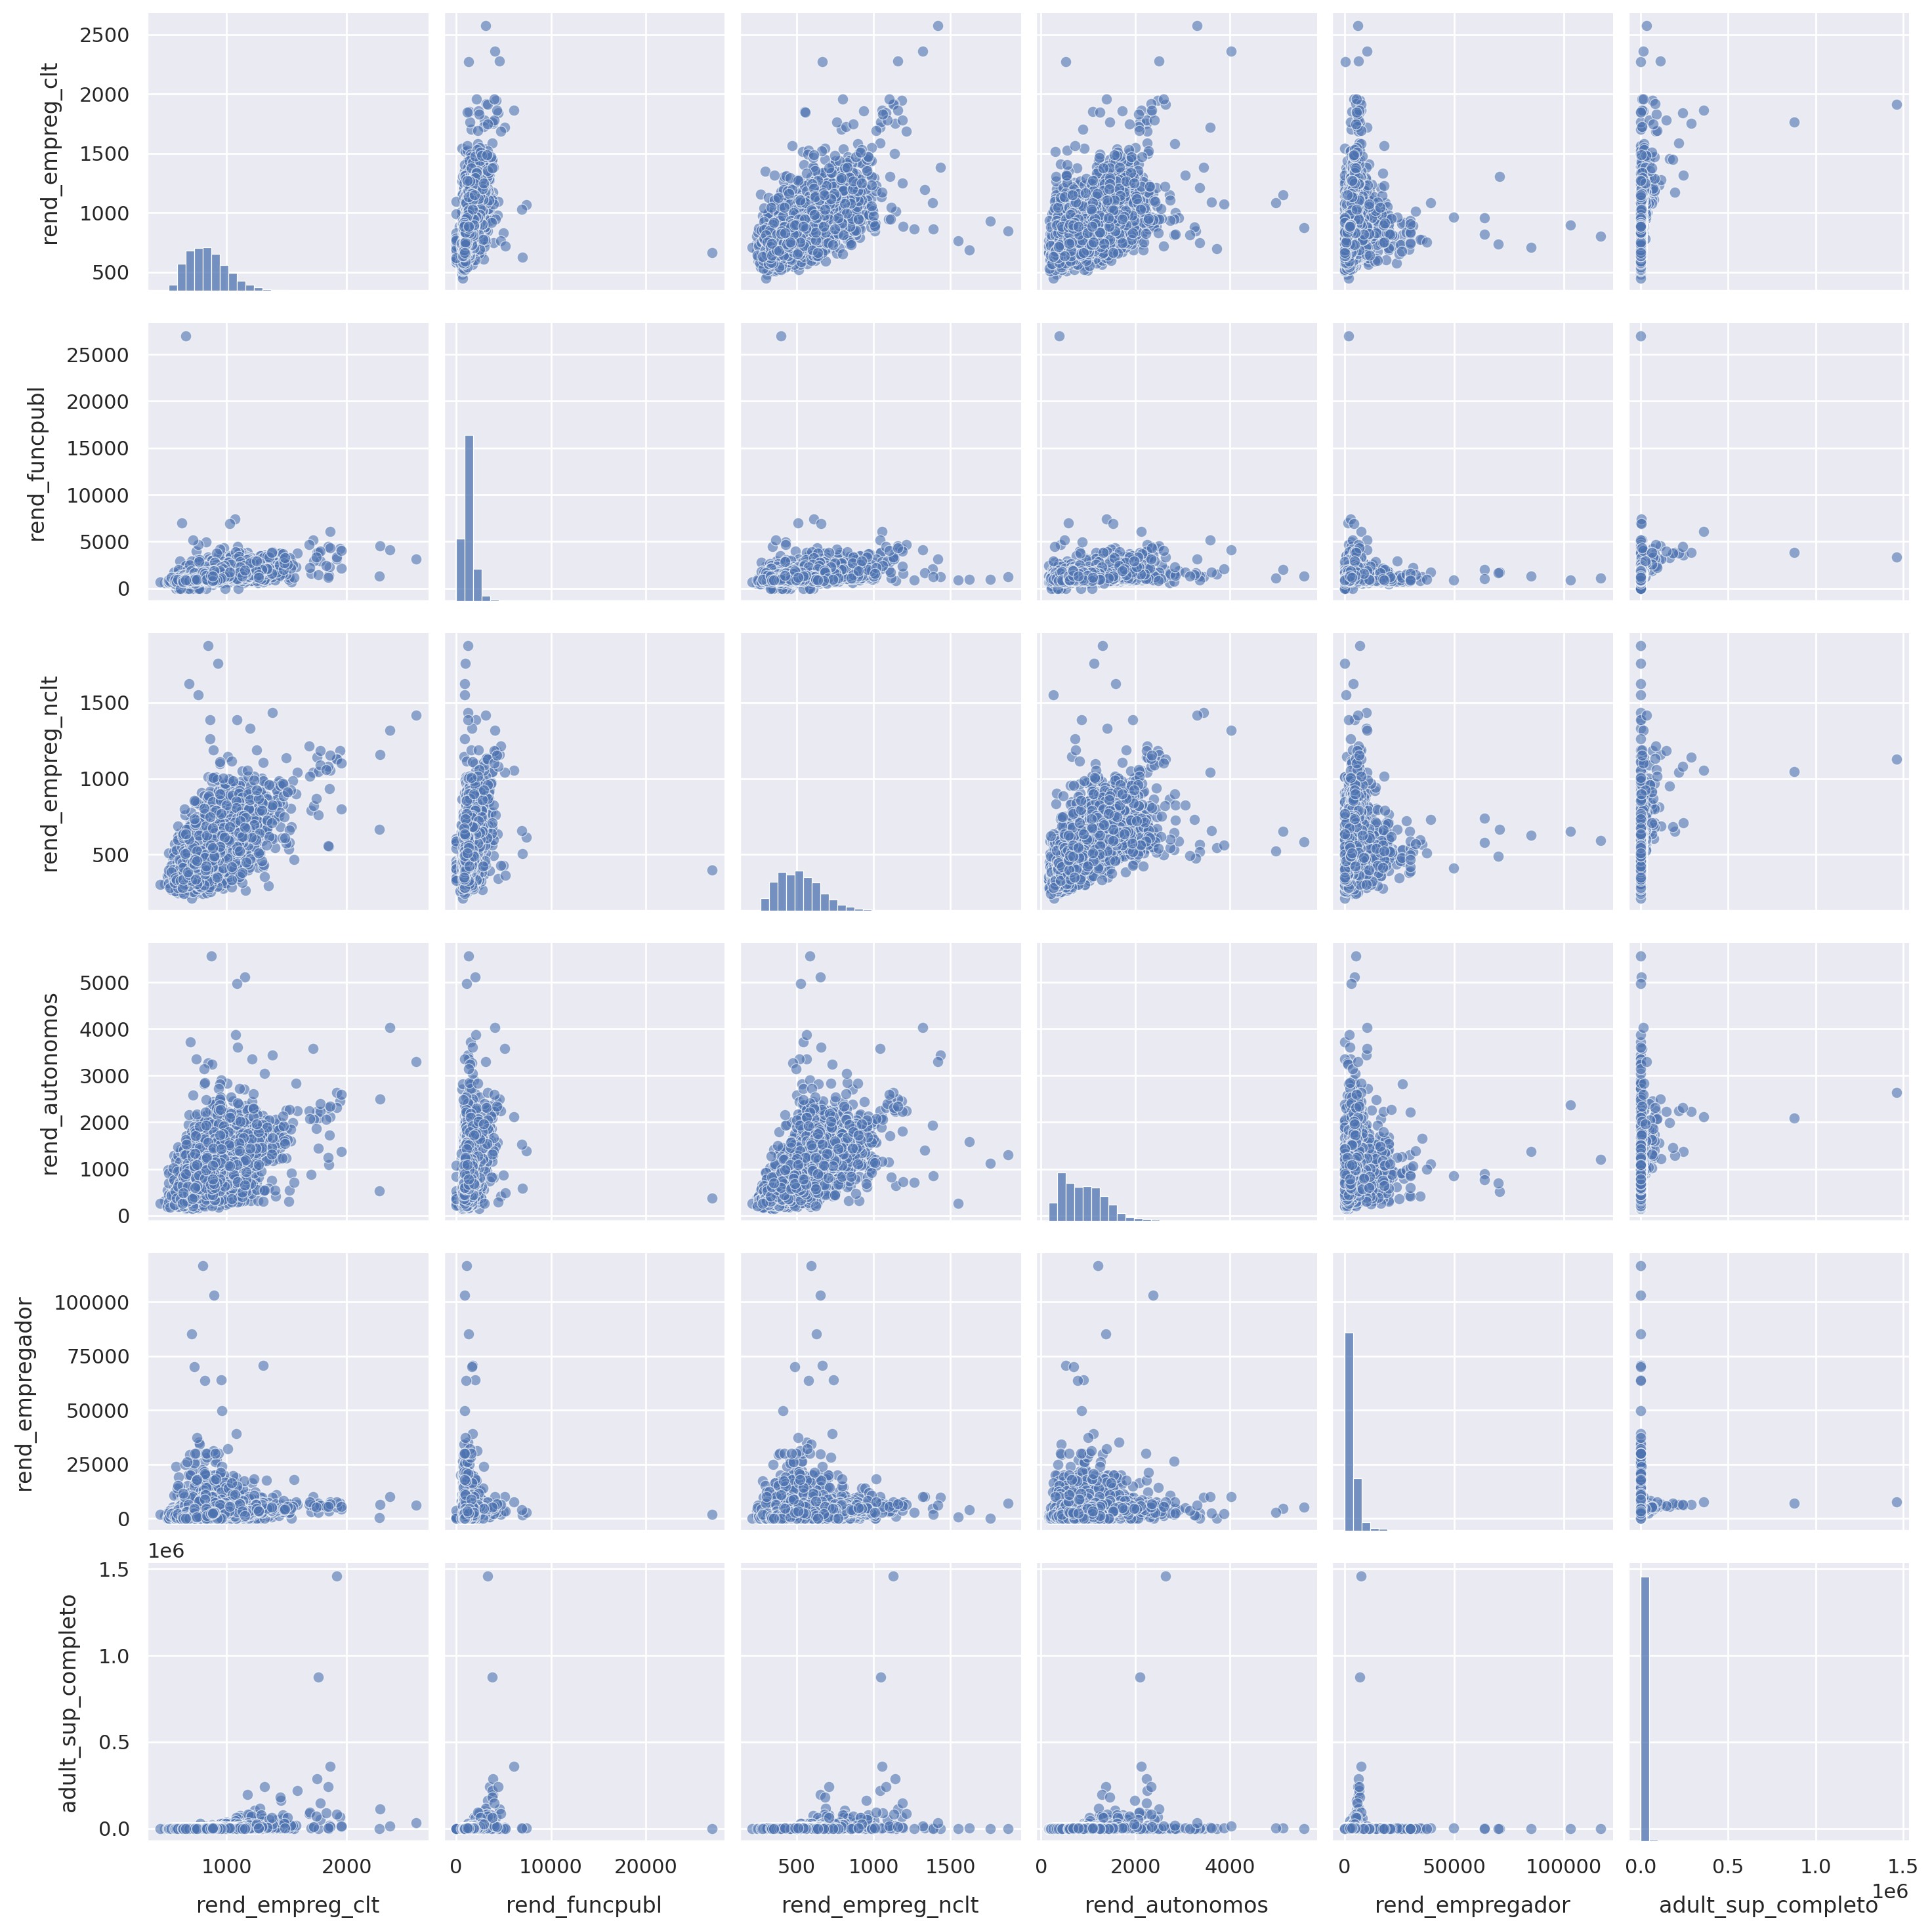

In [19]:
sns.pairplot(df[cols_rent],
              plot_kws={'alpha': 0.6},
              diag_kws={'bins': 30})

In [20]:

pd.DataFrame(
    df.groupby(
        by='Estado'
    )['jovens', 'adultos', 'idosos'].sum()
)

<ipython-input-20-fe9c042c9da2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(


jovens   adultos    idosos
Estado                                          
Acre                  164688    362420    600748
Alagoas               650827   1620728   2704088
Amapá                 152348    339893    547050
Amazonas              765458   1752705   2849465
Bahia                2665894   7648223  12541443
Ceará                1694128   4507971   7584126
Distrito Federal      439270   1543621   2299507
Espírito Santo        603899   2037094   3205320
Goiás                1064633   3467600   5416873
Maranhão             1407700   3289400   5574433
Mato Grosso           565826   1731422   2681559
Mato Grosso do Sul    448083   1372051   2194799
Minas Gerais         3406719  11173186  18148714
Paraná               1837433   5953009   9630815
Paraíba               701466   2008692   3392403
Pará                 1623757   3904086   6371164
Pernambuco           1648506   4788412   7881558
Piauí                 611460   1654746   2774538
Rio Grande do Norte   590875   1742000   2855998
Rio Grande do Sul    1737285   6128965  10136359
Rio de Janeiro       2575572   9253103  15038303
Rondonia              312070    870122   1362450
Roraima                99293    229600    368761
Santa Catarina       1064980   3683794   5785933
Sergipe               410304   1123722   1822947
São Paulo            6628104  24323319  38373354
Tocantins             283534    728655   1194956

In [21]:
pop_renda_faixa_idade = df.groupby(
        by='Estado'
    )['jovens', 'adultos', 'idosos'].sum()

pop_renda_faixa_idade

<ipython-input-21-2ac7edf301af>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pop_renda_faixa_idade = df.groupby(


jovens   adultos    idosos
Estado                                          
Acre                  164688    362420    600748
Alagoas               650827   1620728   2704088
Amapá                 152348    339893    547050
Amazonas              765458   1752705   2849465
Bahia                2665894   7648223  12541443
Ceará                1694128   4507971   7584126
Distrito Federal      439270   1543621   2299507
Espírito Santo        603899   2037094   3205320
Goiás                1064633   3467600   5416873
Maranhão             1407700   3289400   5574433
Mato Grosso           565826   1731422   2681559
Mato Grosso do Sul    448083   1372051   2194799
Minas Gerais         3406719  11173186  18148714
Paraná               1837433   5953009   9630815
Paraíba               701466   2008692   3392403
Pará                 1623757   3904086   6371164
Pernambuco           1648506   4788412   7881558
Piauí                 611460   1654746   2774538
Rio Grande do Norte   590875   1742000   2855998
Rio Grande do Sul    1737285   6128965  10136359
Rio de Janeiro       2575572   9253103  15038303
Rondonia              312070    870122   1362450
Roraima                99293    229600    368761
Santa Catarina       1064980   3683794   5785933
Sergipe               410304   1123722   1822947
São Paulo            6628104  24323319  38373354
Tocantins             283534    728655   1194956

## Renda por estados do Brasil



Explorar a visualização de renda em cada estado do Brasil (de forma analítica e visual)

In [22]:
rend_empreg_clt = df.groupby(
        by='Estado'
    )['rend_empreg_clt'].mean()

rend_empreg_clt

Estado
Acre                   1001.409091
Alagoas                 723.627451
Amapá                  1097.625000
Amazonas               1025.741935
Bahia                   743.880096
Ceará                   694.461957
Distrito Federal       1863.000000
Espírito Santo          884.846154
Goiás                   903.861789
Maranhão                778.751152
Mato Grosso             992.234043
Mato Grosso do Sul      926.615385
Minas Gerais            768.259086
Paraná                  900.984962
Paraíba                 703.878924
Pará                    853.461538
Pernambuco              731.497297
Piauí                   775.790179
Rio Grande do Norte     739.449102
Rio Grande do Sul       897.080645
Rio de Janeiro         1017.402174
Rondonia                946.980769
Roraima                1038.066667
Santa Catarina          971.085324
Sergipe                 775.440000
São Paulo              1019.133333
Tocantins               839.014388
Name: rend_empreg_clt, dtype: float64

Por meio dessa visualização gráfica é possível identificar Outliers da análise, como é o Distrito Federal

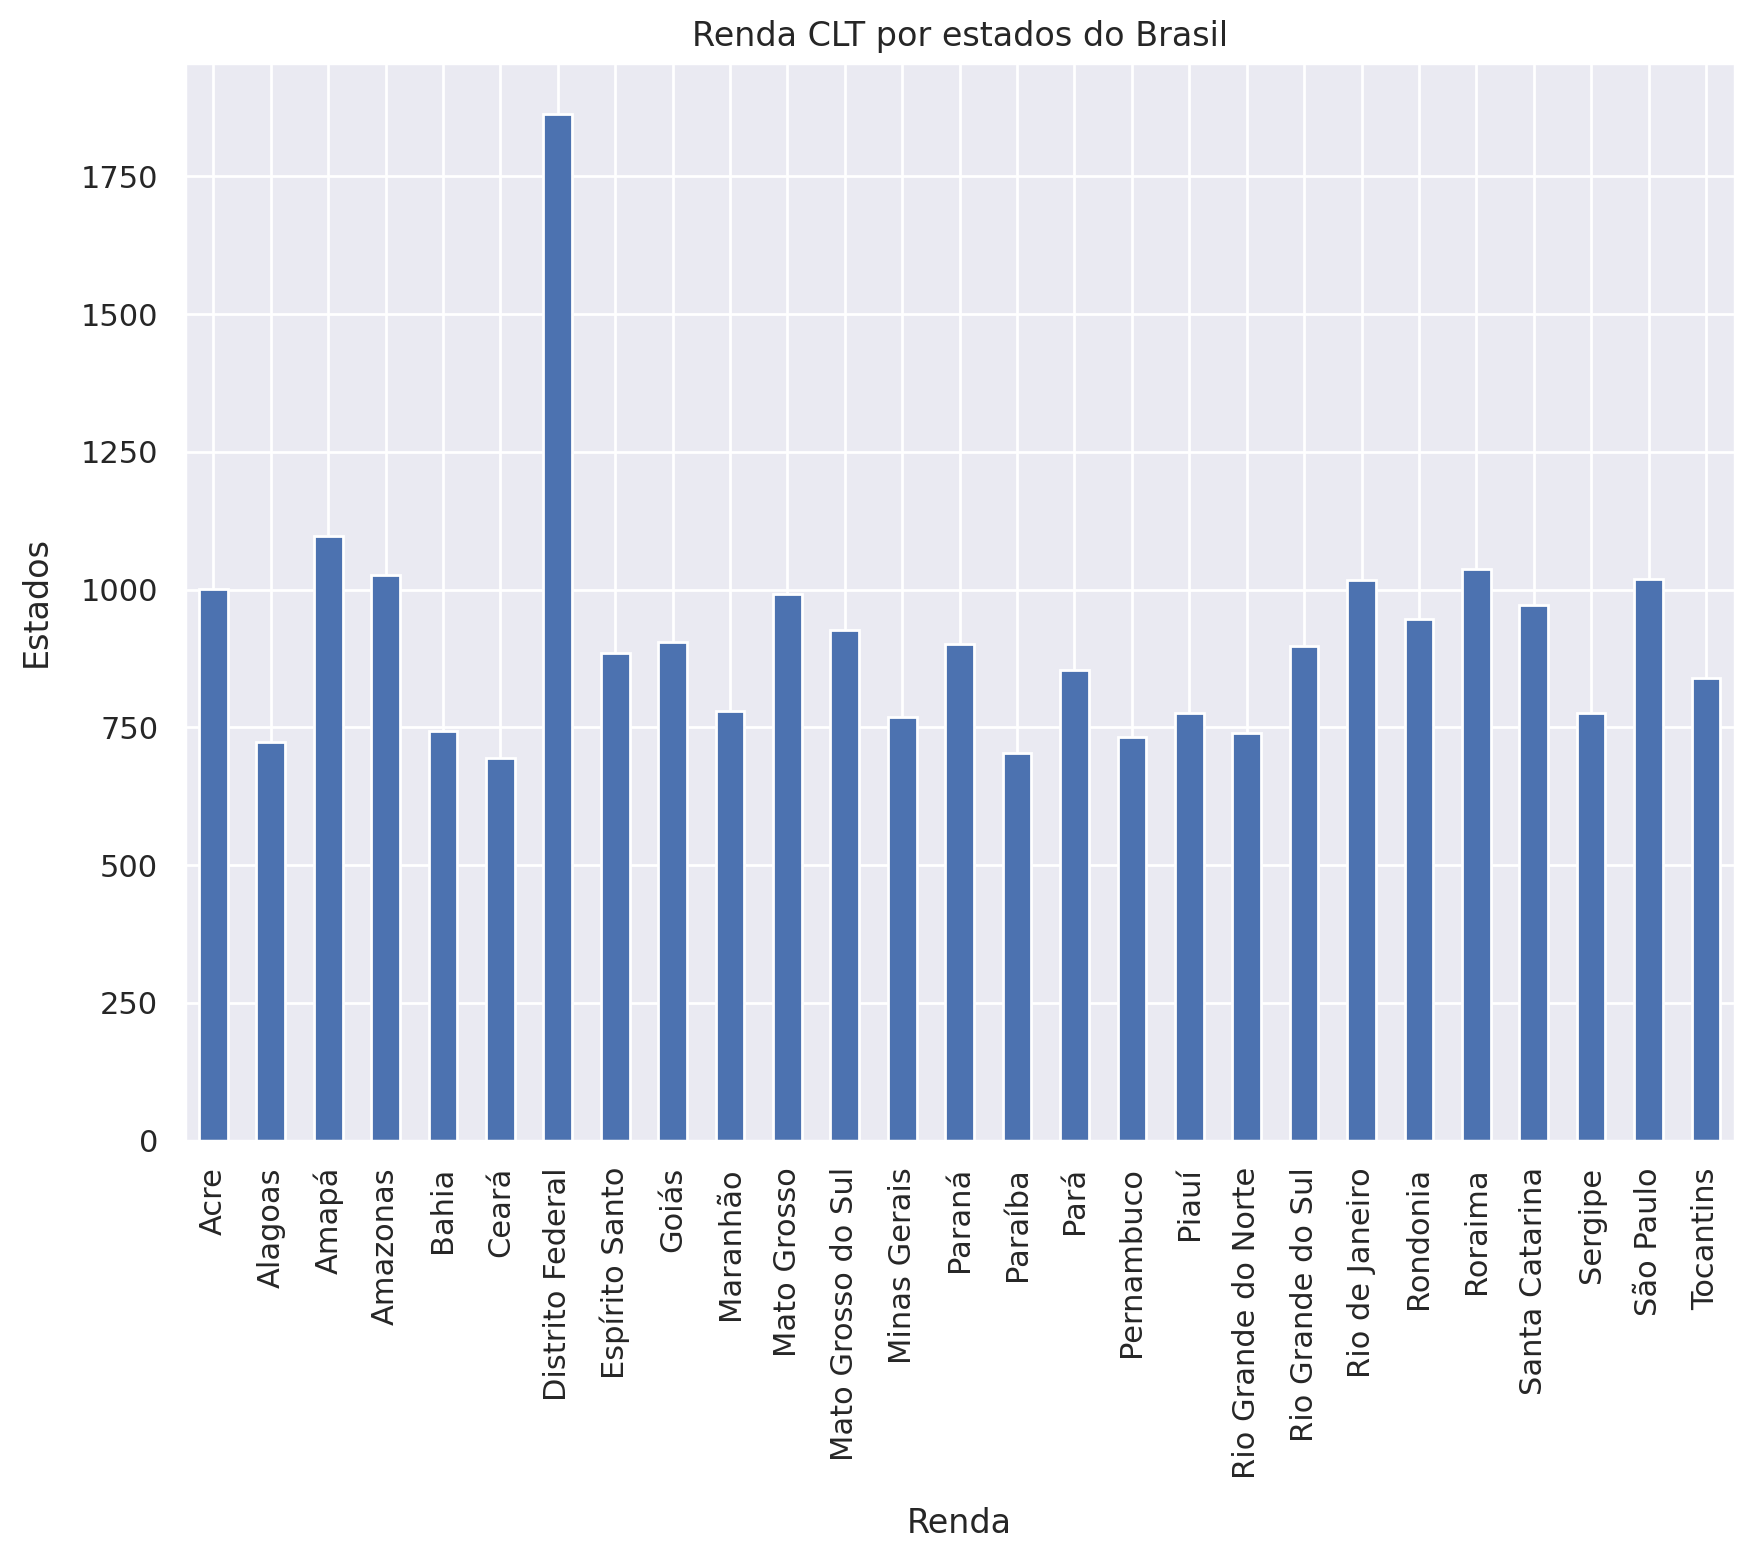

In [23]:
ax = rend_empreg_clt.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda CLT por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

In [24]:
rend_funcpubl = df.groupby(
        by='Estado'
    )['rend_funcpubl'].mean()

rend_funcpubl

Estado
Acre                   1655.636364
Alagoas                 969.254902
Amapá                  1898.312500
Amazonas               1181.806452
Bahia                  1142.201439
Ceará                  1013.369565
Distrito Federal       6101.000000
Espírito Santo         1525.397436
Goiás                  1294.947154
Maranhão                923.682028
Mato Grosso            1368.460993
Mato Grosso do Sul     1599.141026
Minas Gerais           1106.907386
Paraná                 1616.518797
Paraíba                 918.286996
Pará                   1074.923077
Pernambuco             1072.854054
Piauí                  1058.549107
Rio Grande do Norte    1132.652695
Rio Grande do Sul      1437.897177
Rio de Janeiro         1745.815217
Rondonia               1409.192308
Roraima                1466.333333
Santa Catarina         1611.474403
Sergipe                1180.093333
São Paulo              1757.936434
Tocantins              1175.431655
Name: rend_funcpubl, dtype: float64

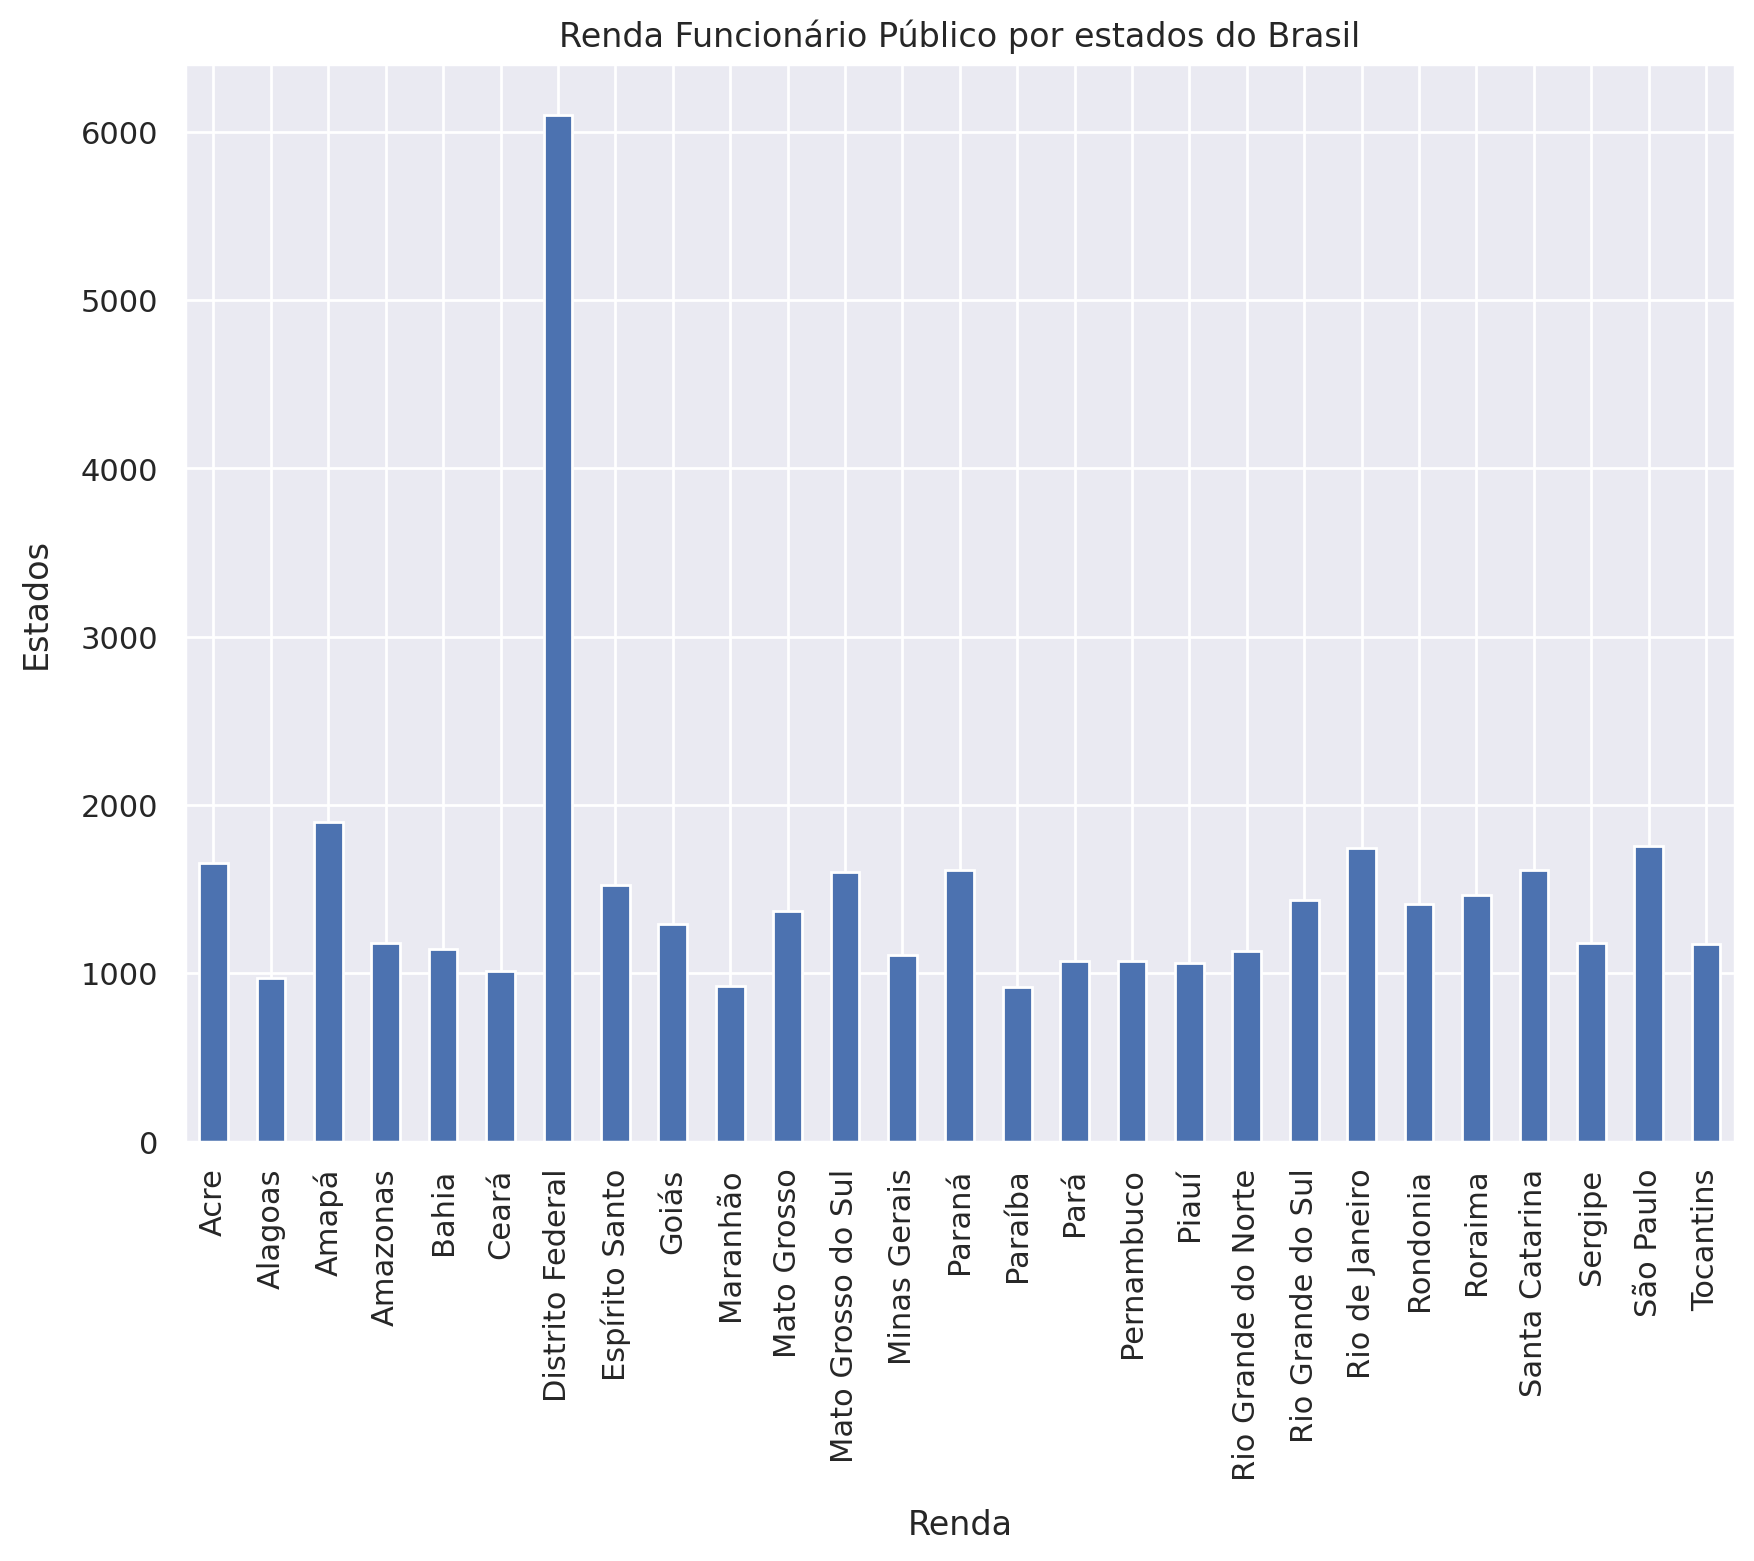

In [25]:
ax = rend_funcpubl.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda Funcionário Público por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

In [26]:
rend_empreg_nclt = df.groupby(
        by='Estado'
    )['rend_empreg_nclt'].mean()

rend_empreg_nclt

Estado
Acre                    583.454545
Alagoas                 397.598039
Amapá                   641.812500
Amazonas                612.274194
Bahia                   398.417266
Ceará                   367.809783
Distrito Federal       1056.000000
Espírito Santo          552.935897
Goiás                   598.991870
Maranhão                442.631336
Mato Grosso             685.446809
Mato Grosso do Sul      589.025641
Minas Gerais            501.484174
Paraná                  561.338346
Paraíba                 384.219731
Pará                    518.986014
Pernambuco              409.513514
Piauí                   387.142857
Rio Grande do Norte     414.125749
Rio Grande do Sul       609.981855
Rio de Janeiro          619.760870
Rondonia                567.000000
Roraima                 655.933333
Santa Catarina          668.416382
Sergipe                 400.146667
São Paulo               632.862016
Tocantins               536.474820
Name: rend_empreg_nclt, dtype: float64

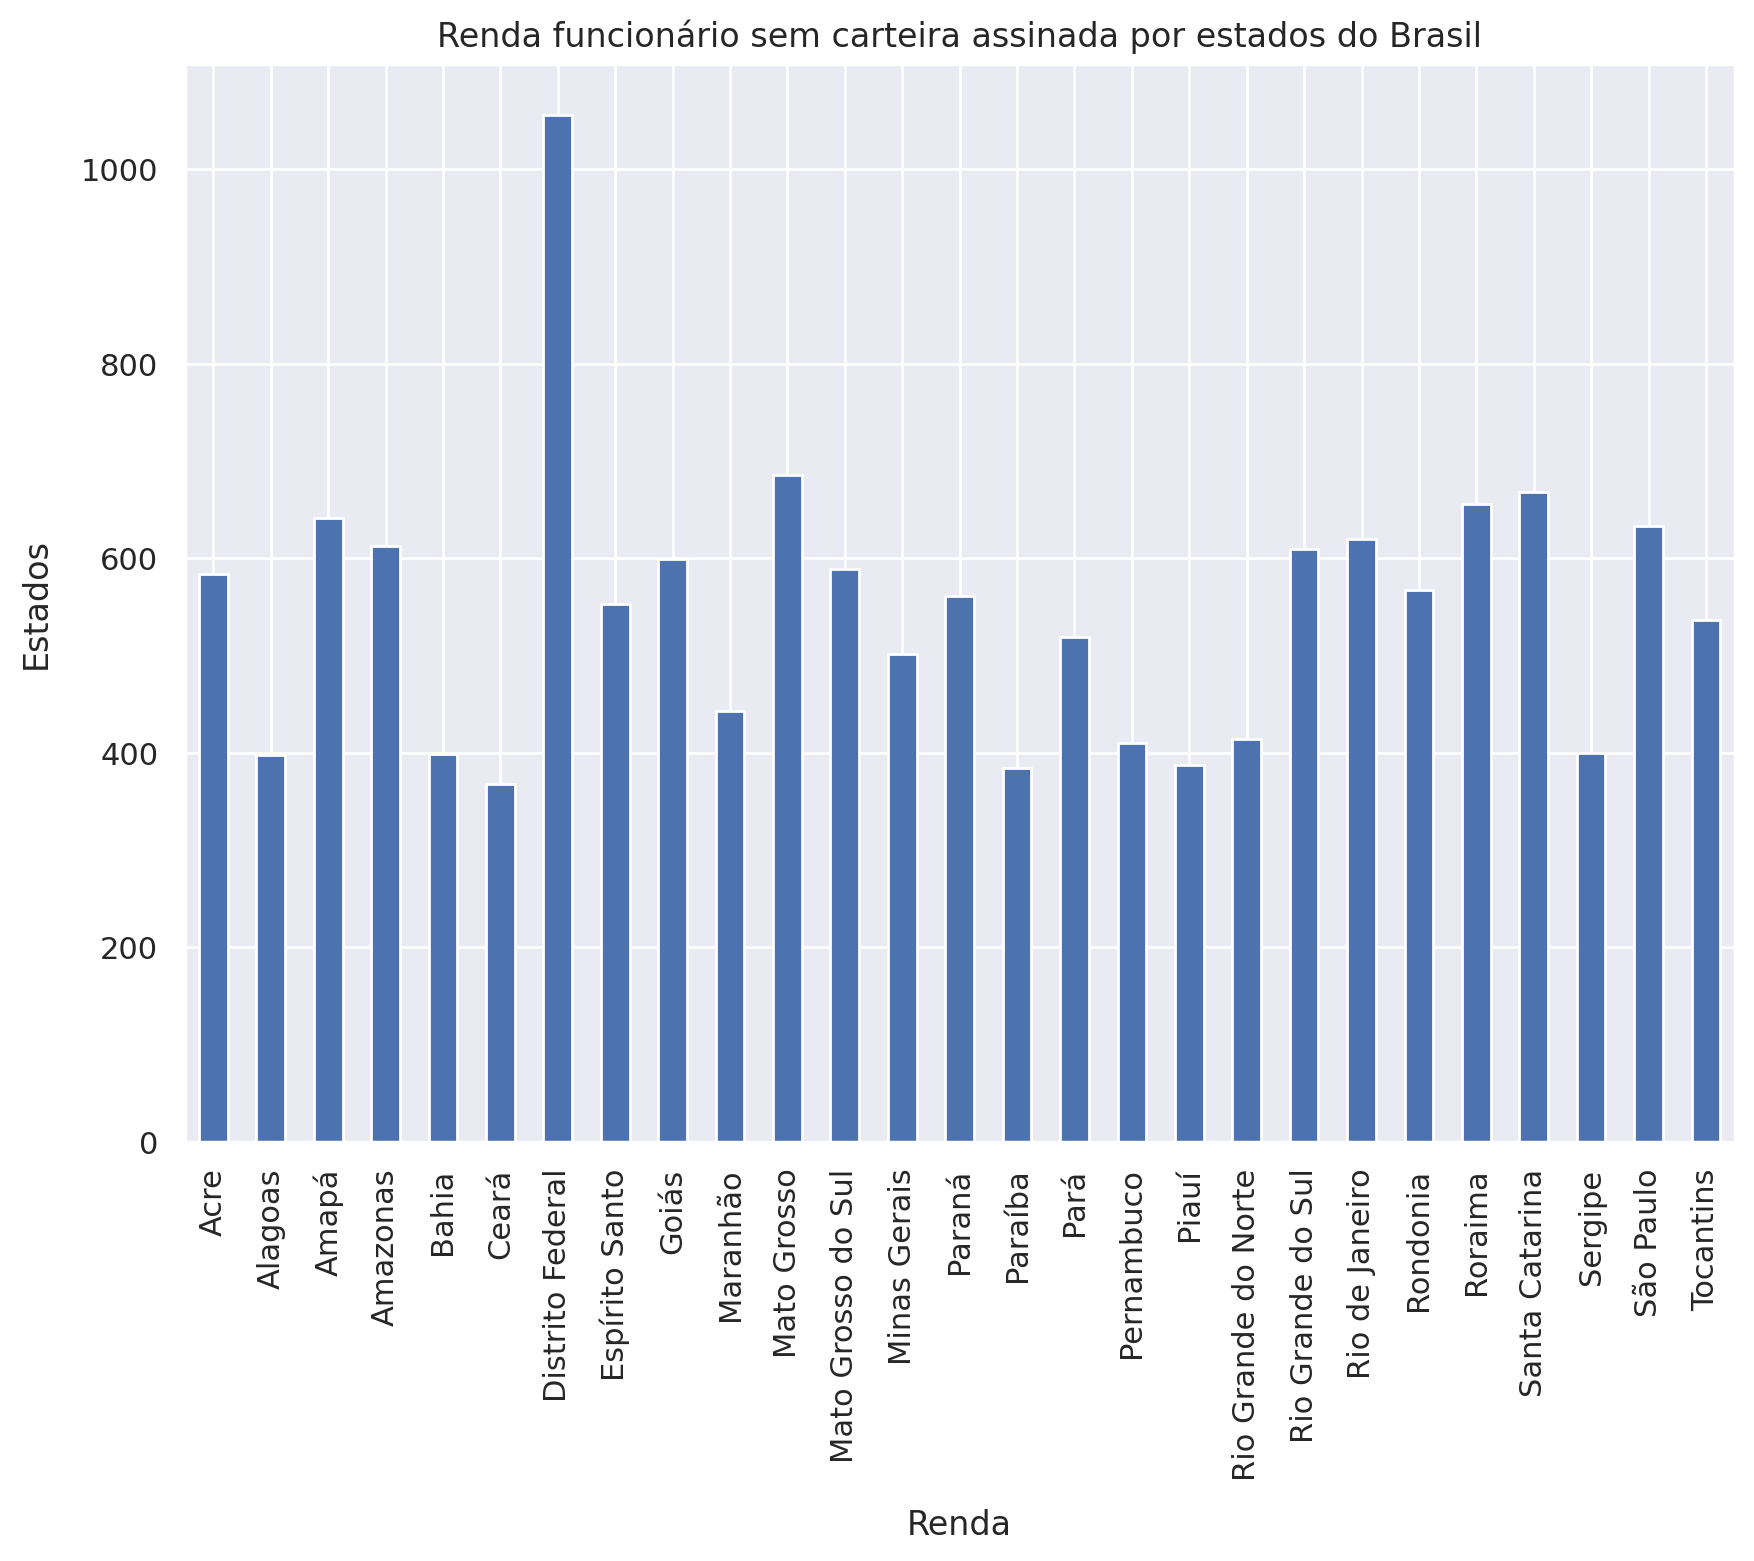

In [27]:
ax = rend_empreg_nclt.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda funcionário sem carteira assinada por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

In [28]:
rend_autonomos = df.groupby(
        by='Estado'
    )['rend_autonomos'].mean()

rend_autonomos

Estado
Acre                    742.227273
Alagoas                 522.764706
Amapá                   816.937500
Amazonas                617.854839
Bahia                   525.577938
Ceará                   469.923913
Distrito Federal       2119.000000
Espírito Santo          942.743590
Goiás                  1239.430894
Maranhão                472.718894
Mato Grosso            1359.652482
Mato Grosso do Sul     1255.089744
Minas Gerais            957.066823
Paraná                 1130.258145
Paraíba                 457.618834
Pará                    679.426573
Pernambuco              531.416216
Piauí                   415.116071
Rio Grande do Norte     528.029940
Rio Grande do Sul      1123.241935
Rio de Janeiro         1064.141304
Rondonia               1014.403846
Roraima                 853.733333
Santa Catarina         1202.890785
Sergipe                 473.946667
São Paulo              1355.815504
Tocantins               883.884892
Name: rend_autonomos, dtype: float64

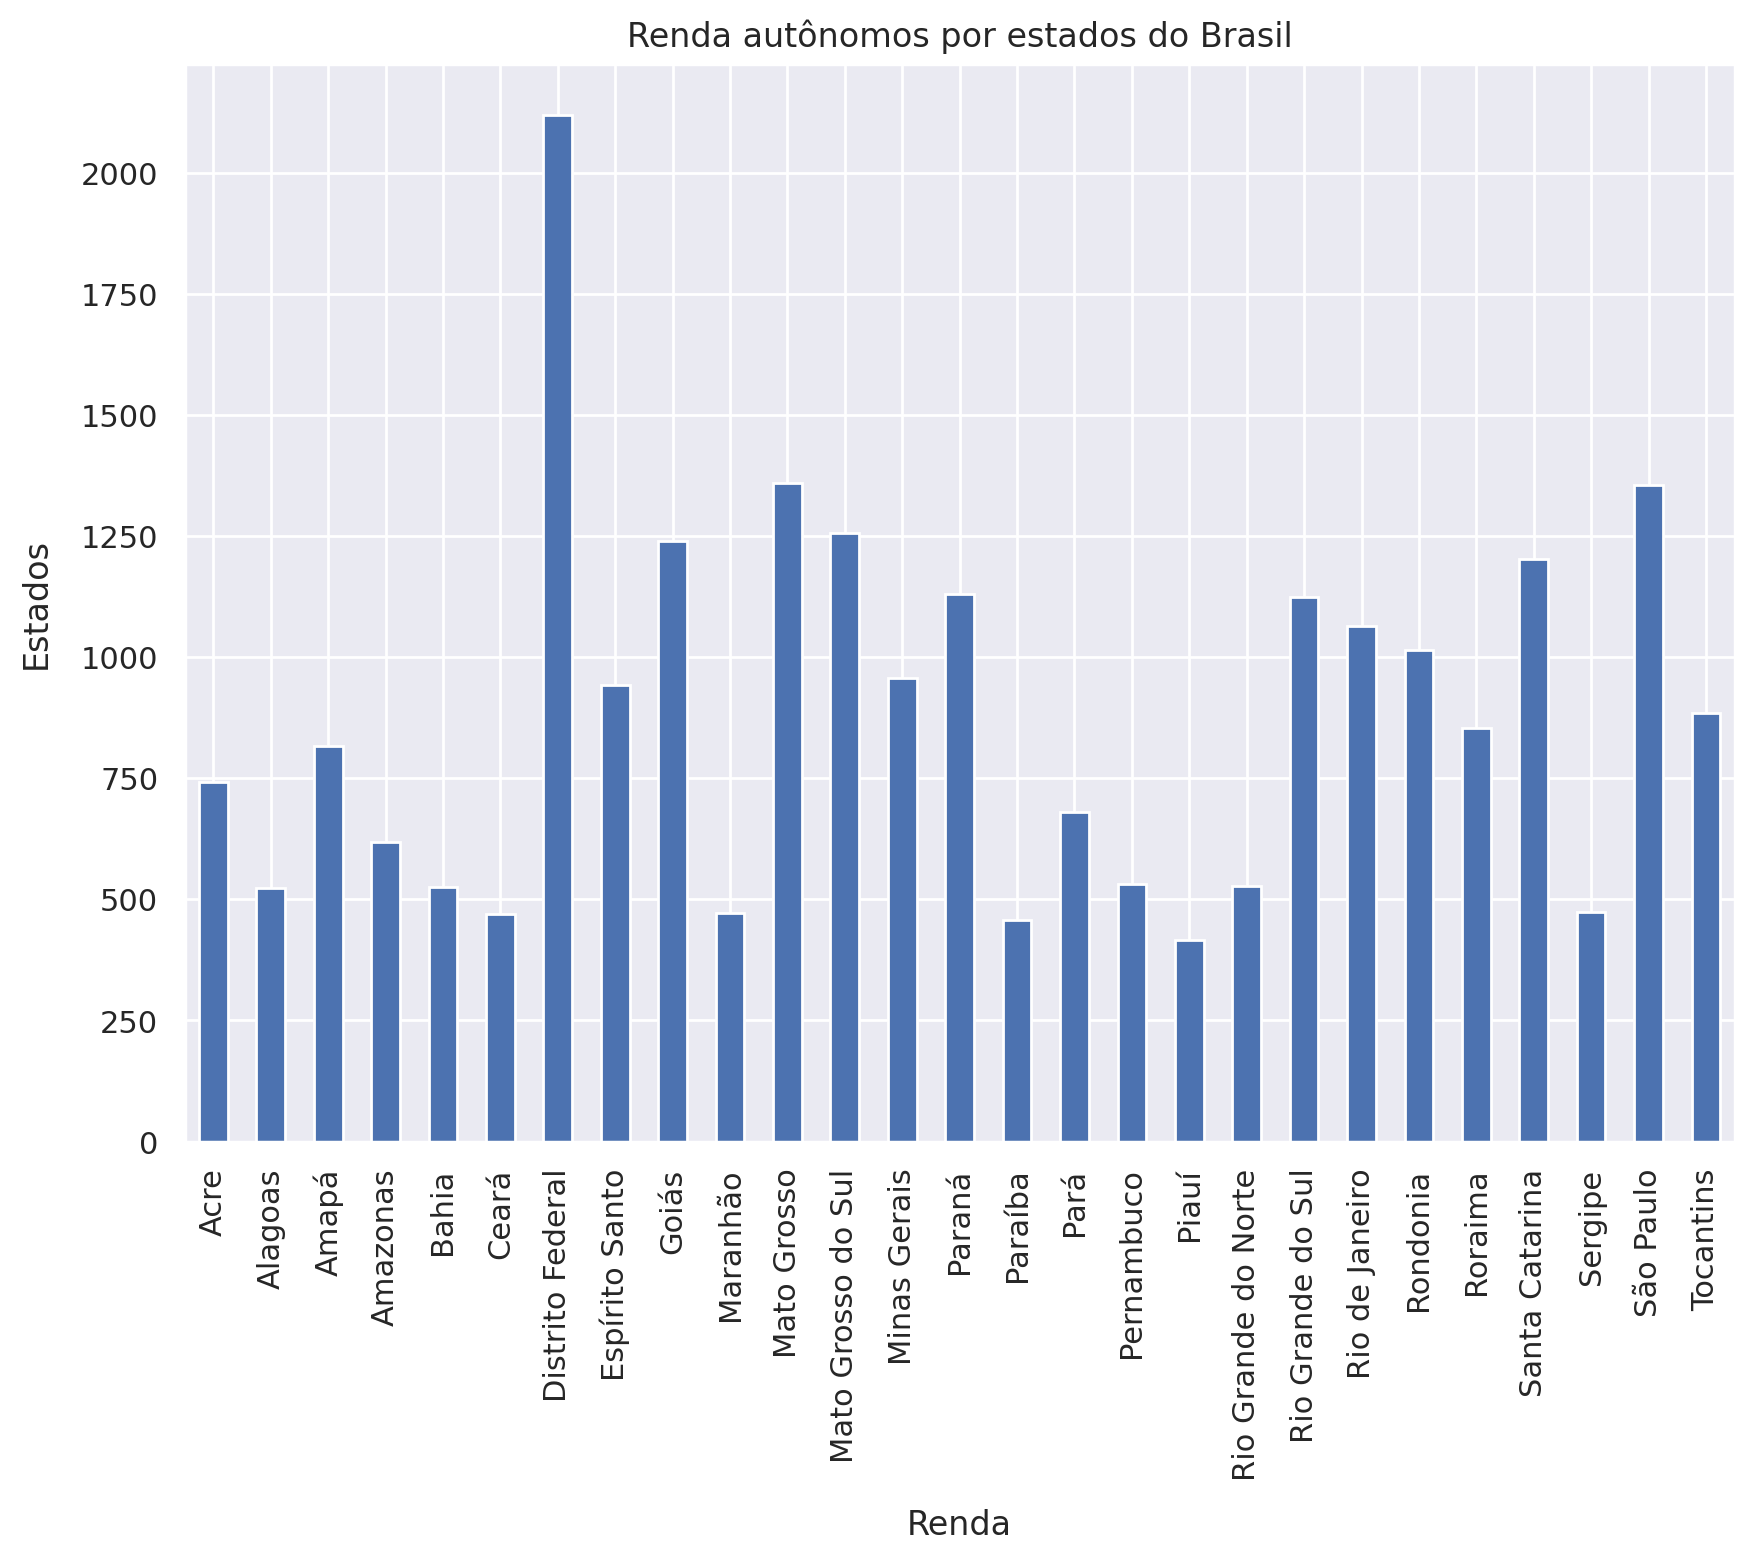

In [29]:
ax = rend_autonomos.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda autônomos por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

In [30]:
rend_empregador = df.groupby(
        by='Estado'
    )['rend_empregador'].mean()

rend_empregador

Estado
Acre                   4568.090909
Alagoas                2317.607843
Amapá                  4914.812500
Amazonas               5110.629032
Bahia                  2508.472422
Ceará                  2088.038043
Distrito Federal       7475.000000
Espírito Santo         3521.166667
Goiás                  4599.471545
Maranhão               2652.156682
Mato Grosso            4310.070922
Mato Grosso do Sul     5108.628205
Minas Gerais           3184.187573
Paraná                 3718.478697
Paraíba                1744.121076
Pará                   4360.902098
Pernambuco             2715.156757
Piauí                  1938.084821
Rio Grande do Norte    2092.892216
Rio Grande do Sul      3775.566532
Rio de Janeiro         3605.565217
Rondonia               4052.192308
Roraima                3020.400000
Santa Catarina         3476.542662
Sergipe                2211.586667
São Paulo              4132.153488
Tocantins              3363.151079
Name: rend_empregador, dtype: float64

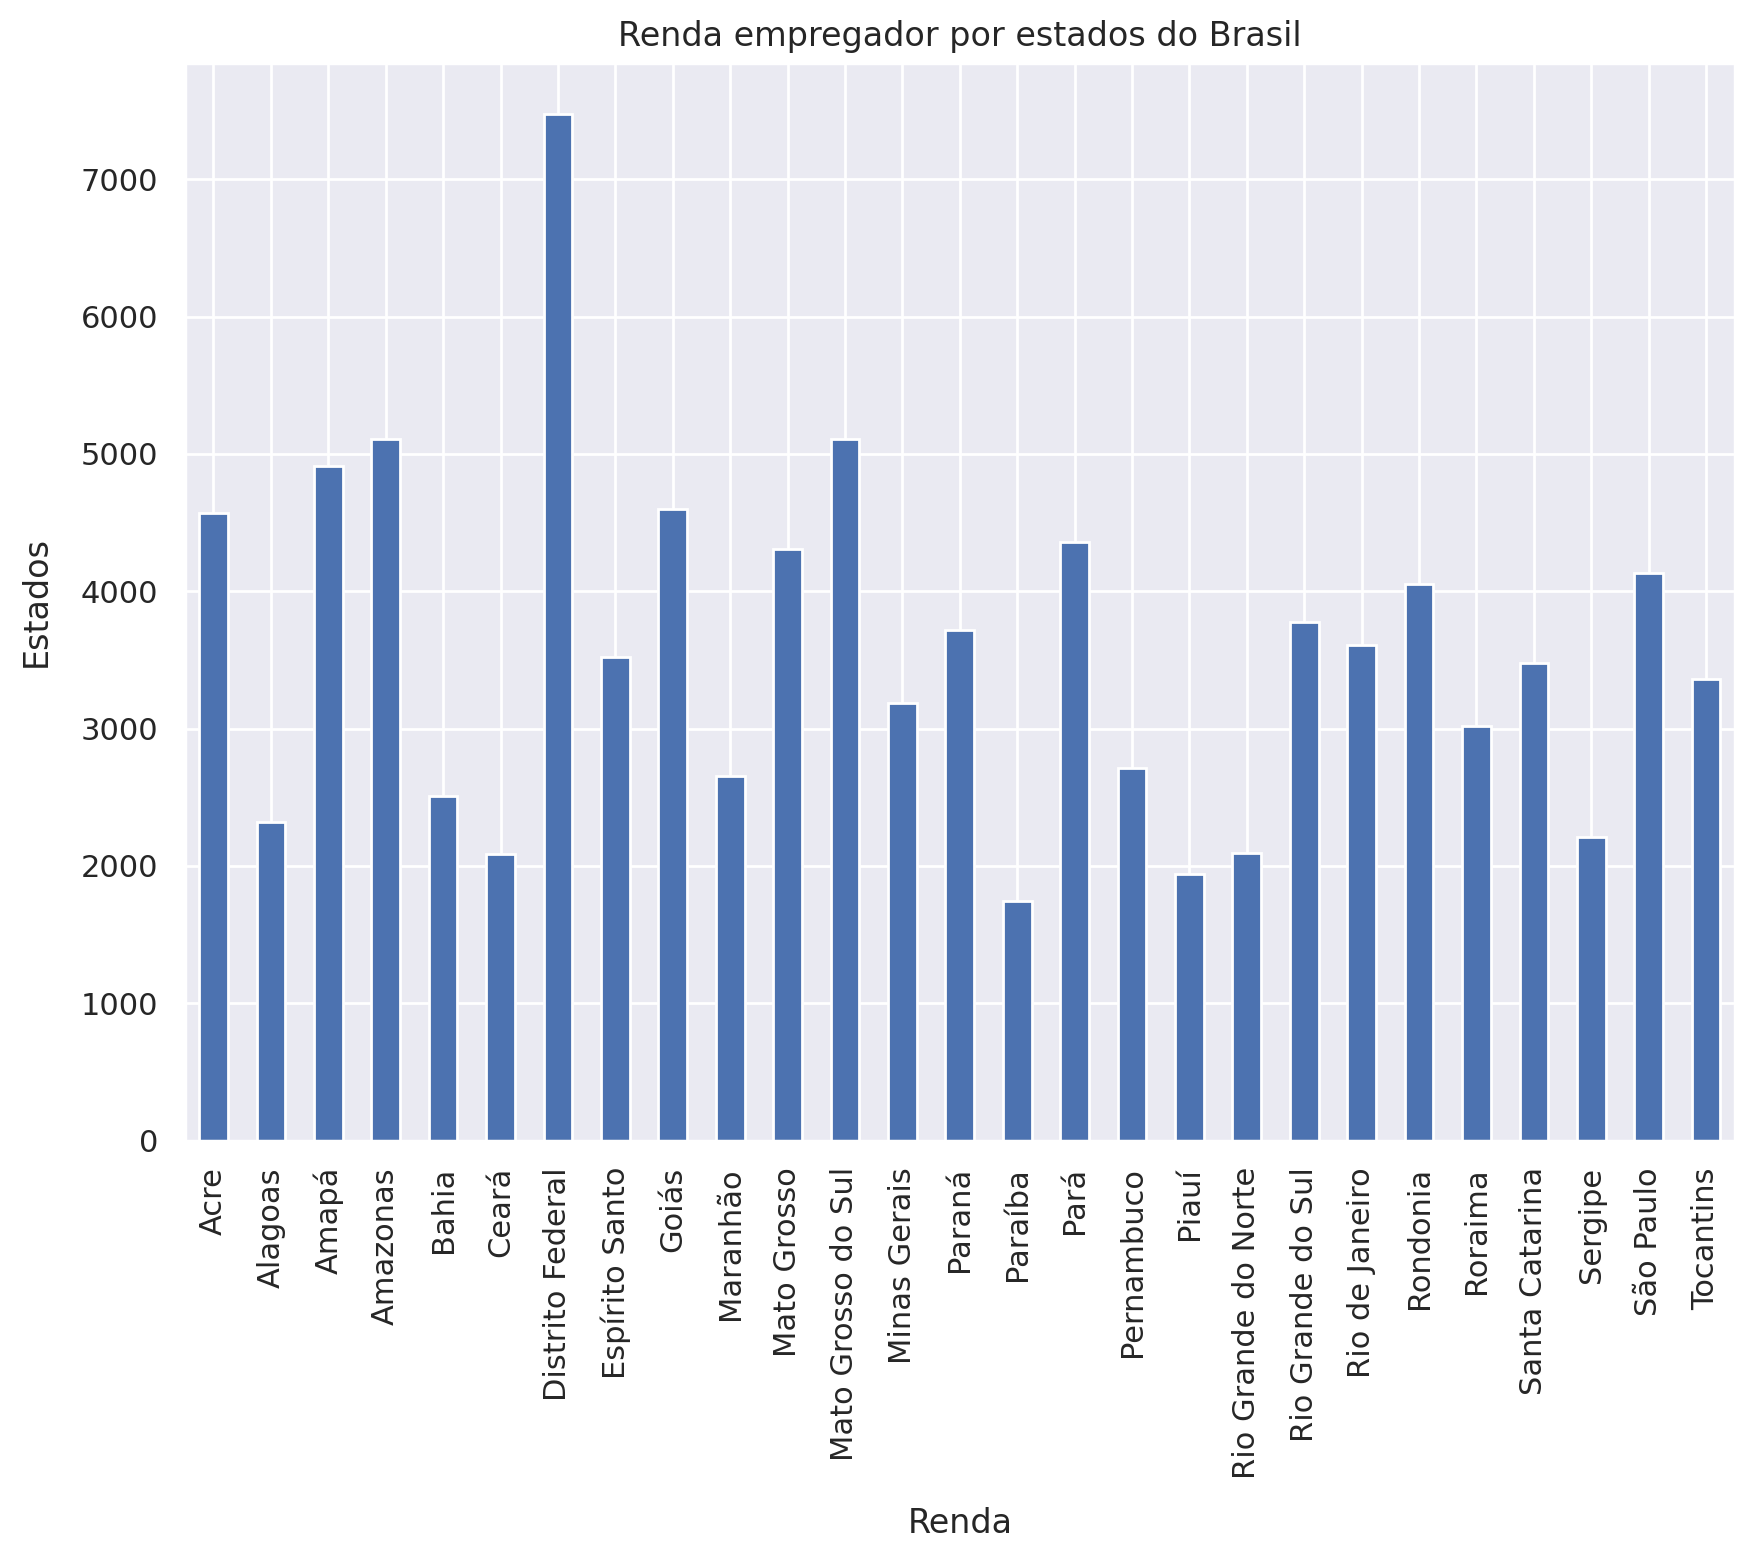

In [31]:
ax = rend_empregador.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda empregador por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

## Região norte - renda

Visualização de Renda por faixa etária - utilizada uma divisão entre jovens (pessoas até 19 anos), Adultos (pessoas com idade entre 20 até 59 anos) e Idosos (pessoas de 60 anos em diante).

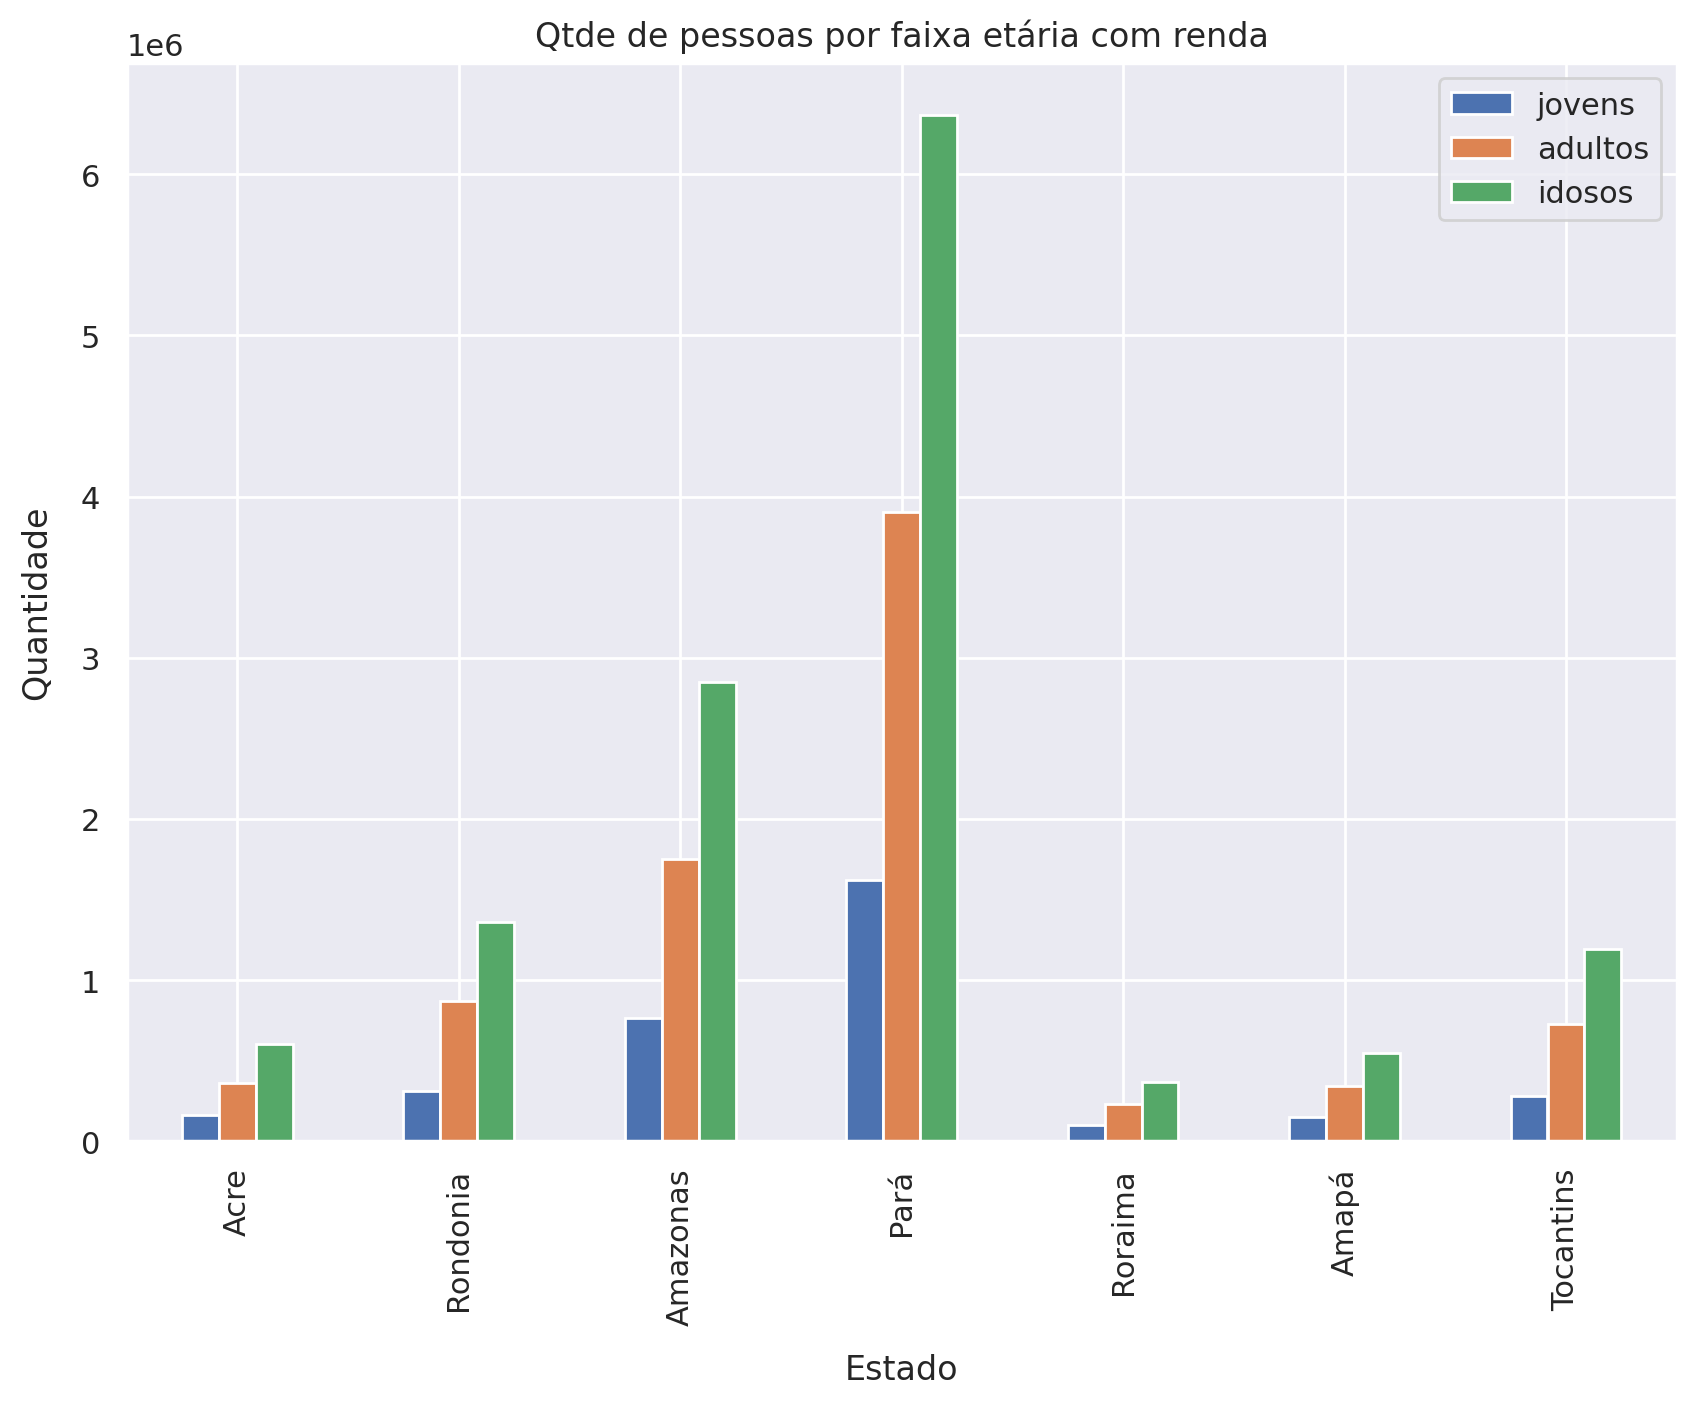

In [32]:
ax = pop_renda_faixa_idade.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='bar',
    grid=True,
    figsize=(10, 7),
    title='Qtde de pessoas por faixa etária com renda'
)

ax.set_xlabel('Estado')
ax.set_ylabel('Quantidade')

plt.show()

Renda por empregados CLT

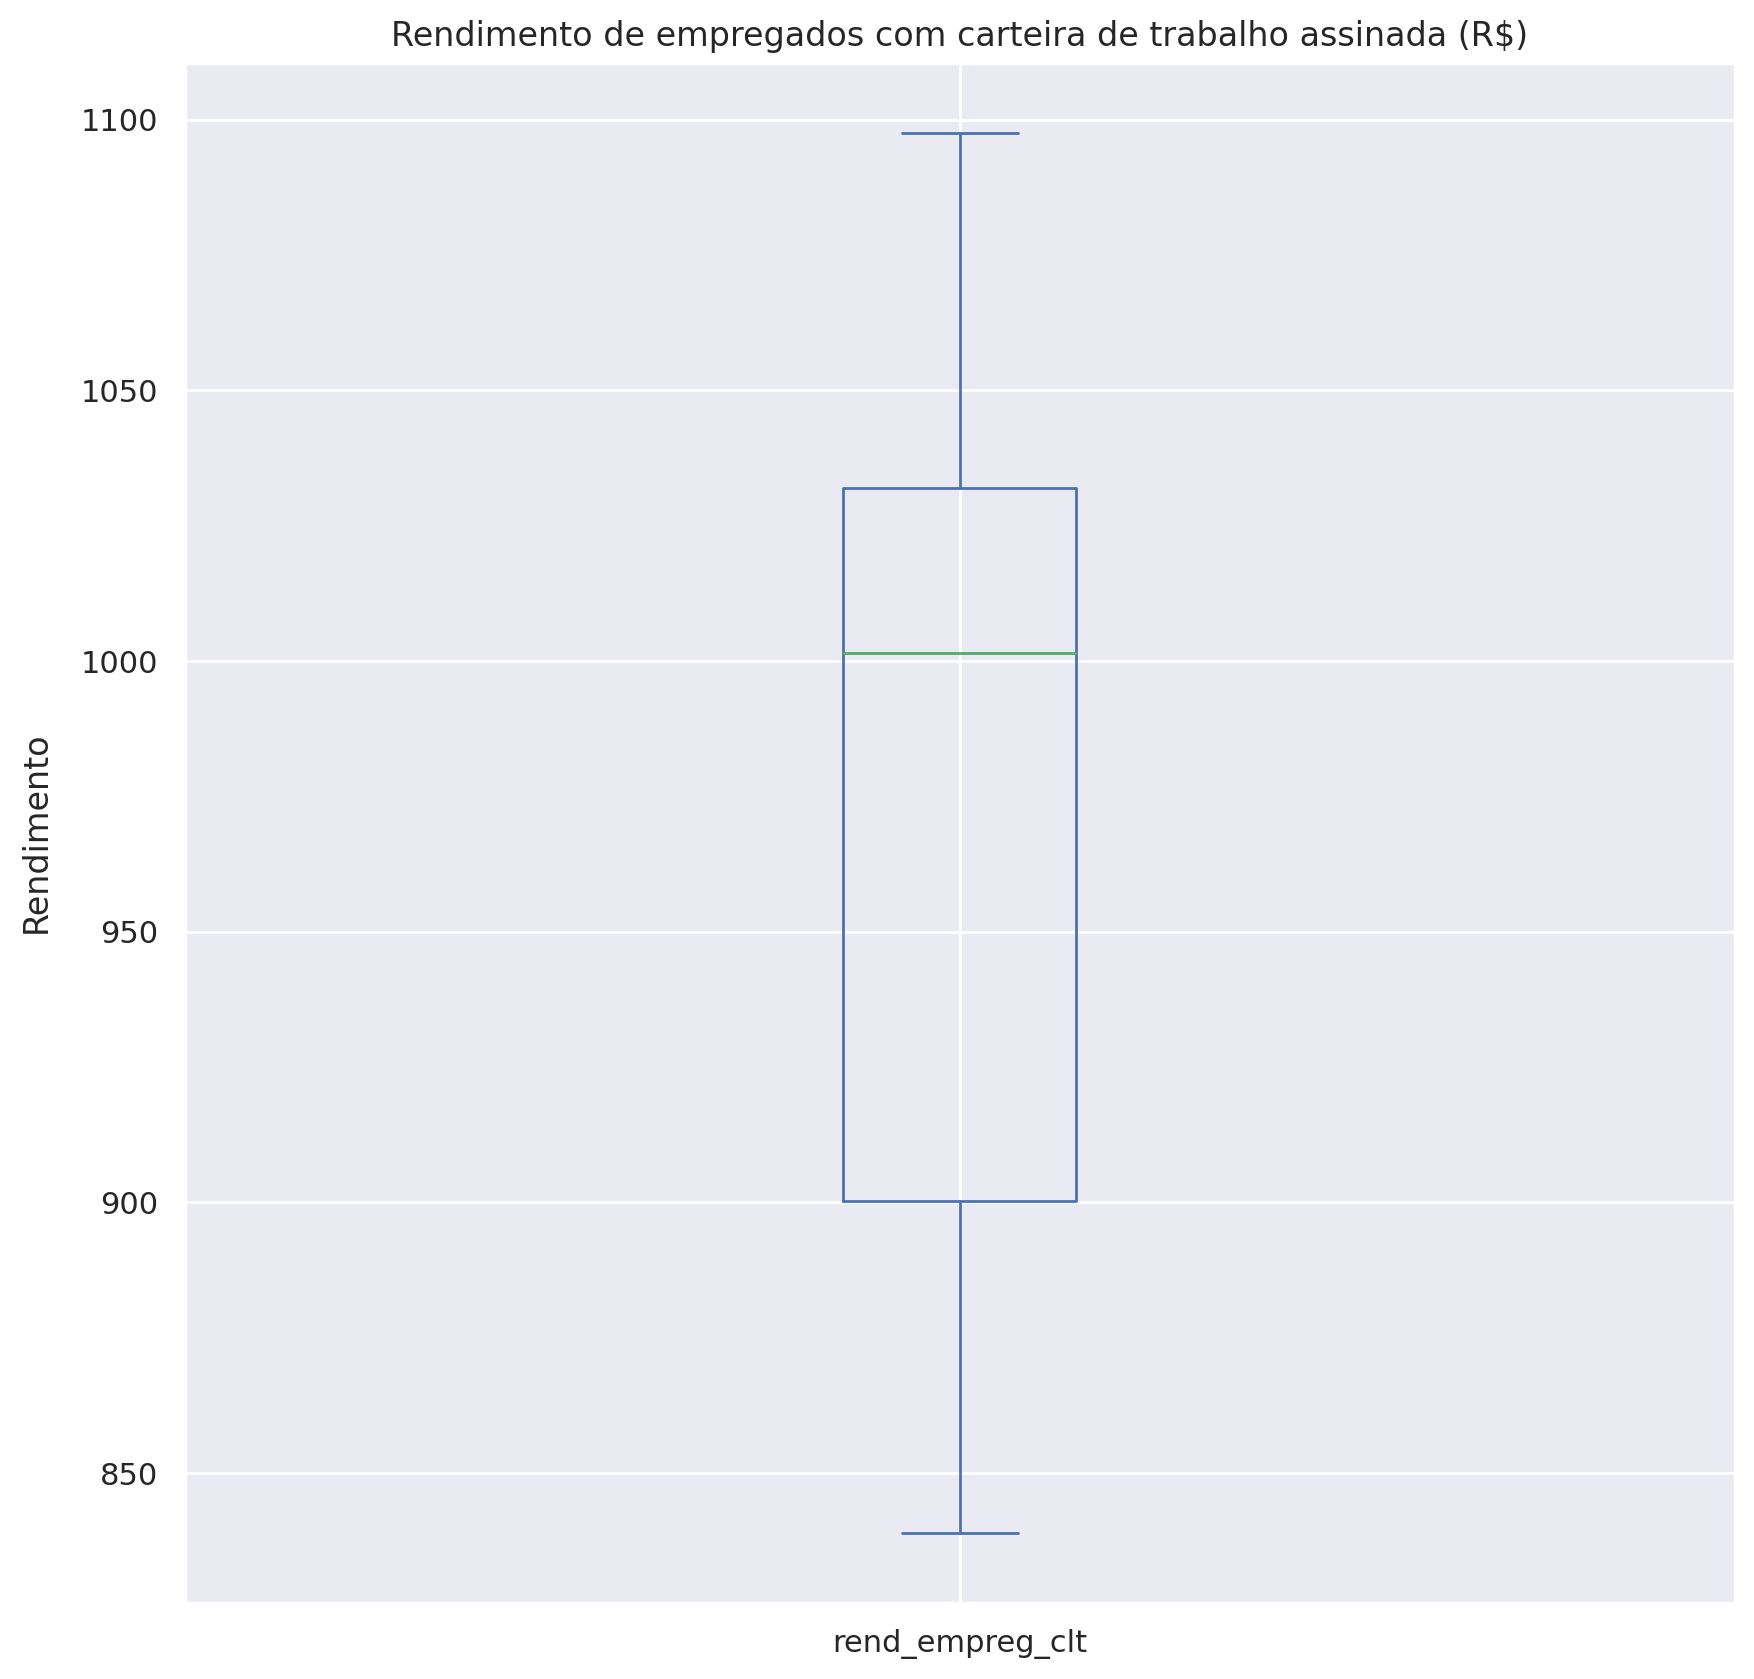

In [33]:
ax = rend_empreg_clt.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento de empregados com carteira de trabalho assinada (R$)')

plt.show()

Renda por funcionário público

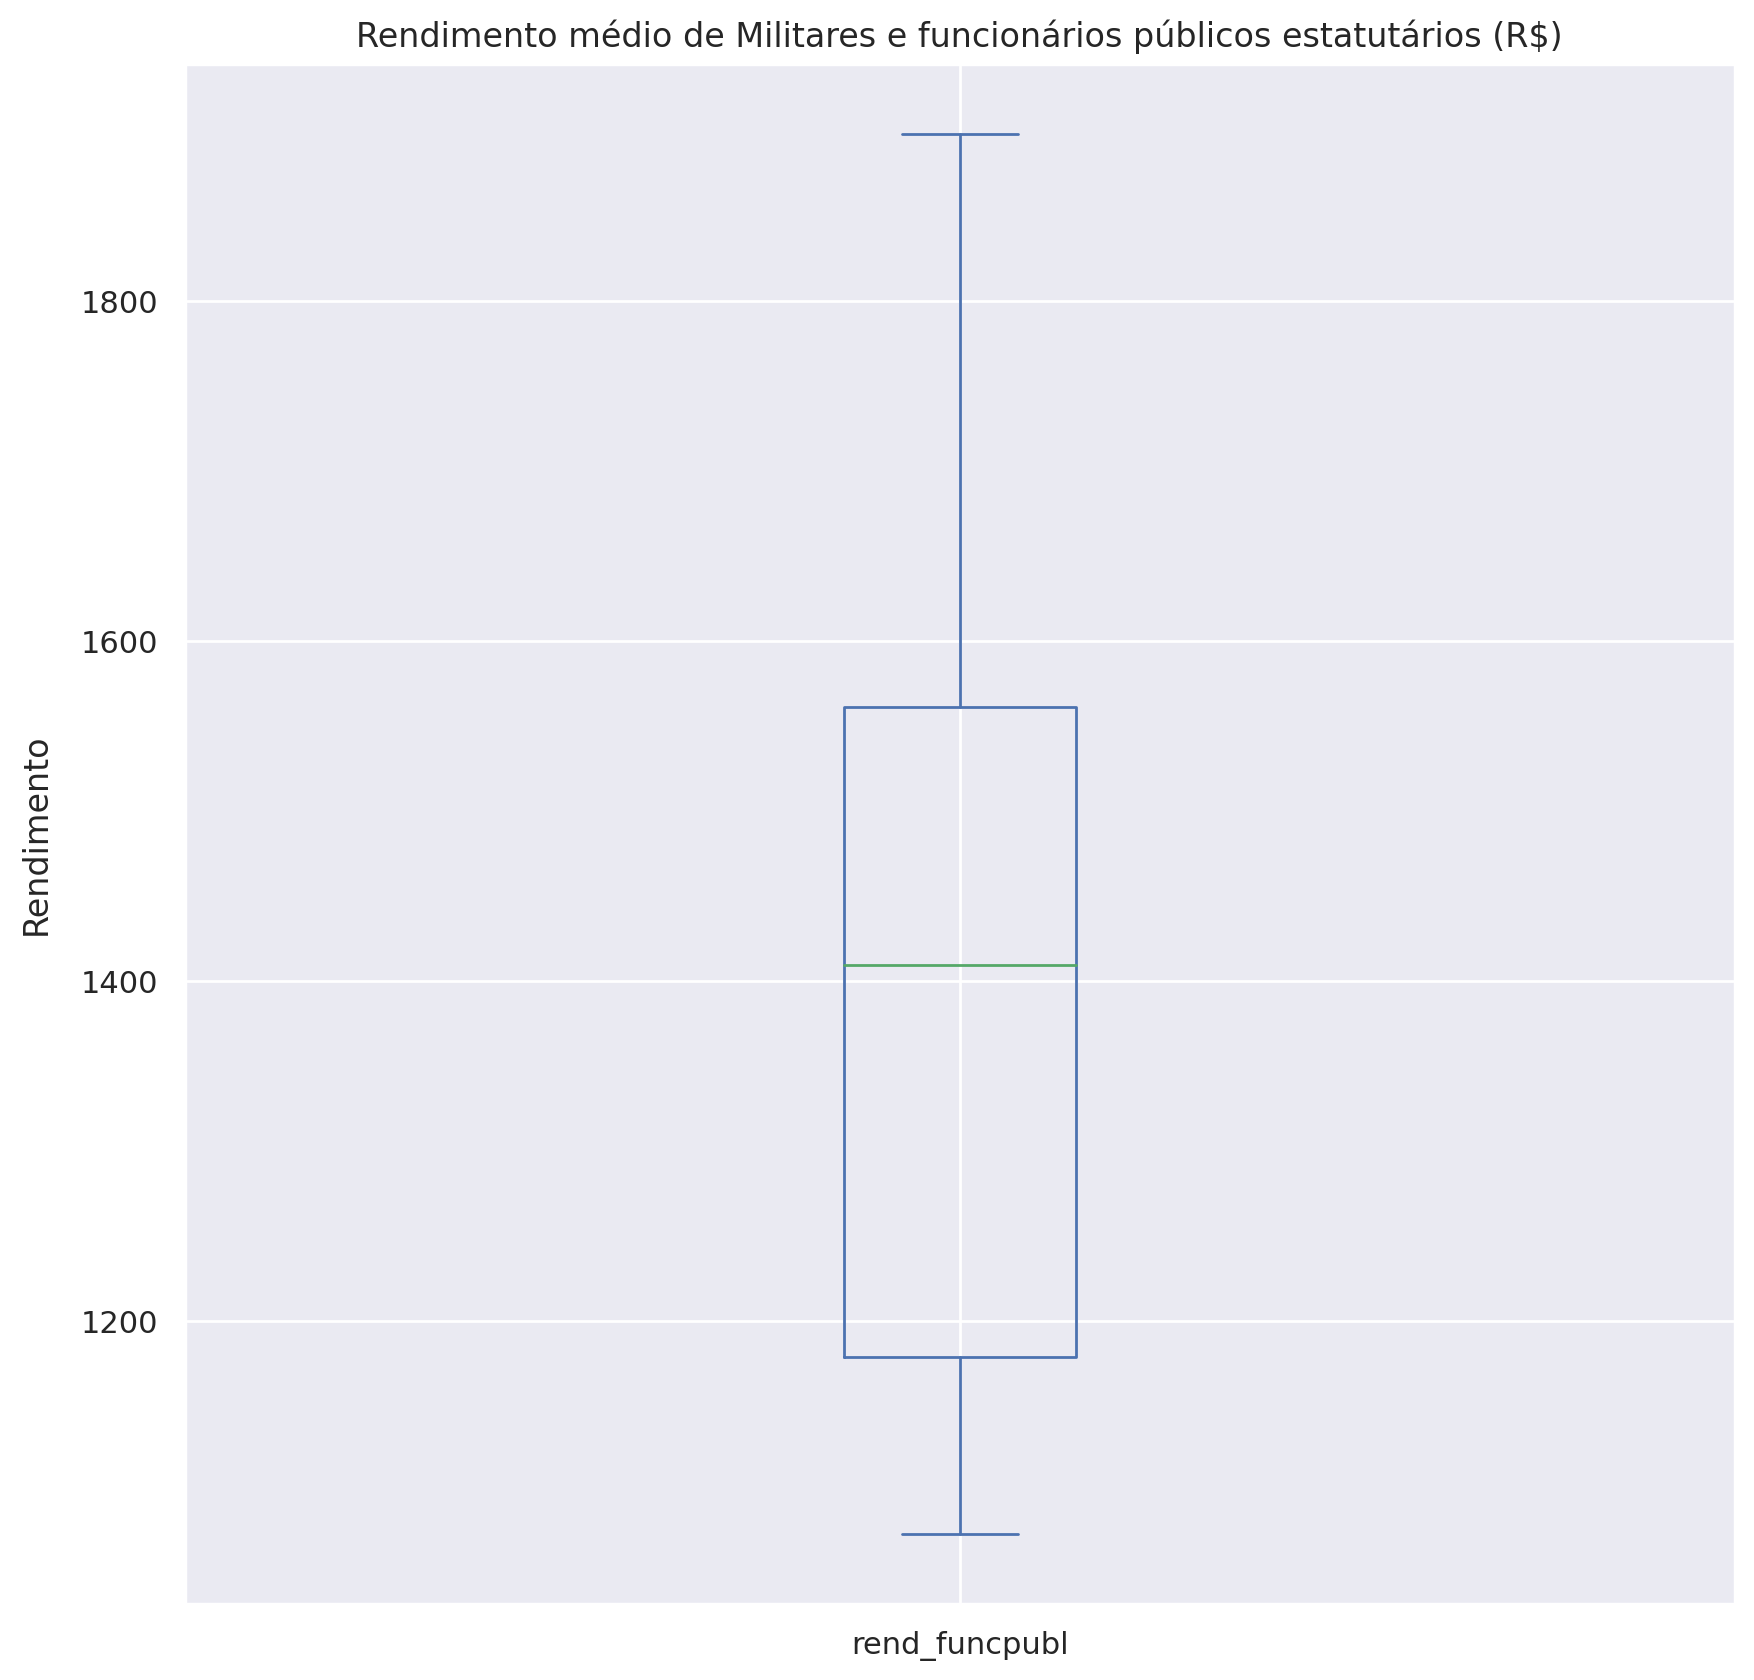

In [34]:
ax = rend_funcpubl.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento médio de Militares e funcionários públicos estatutários (R$)')

plt.show()

Renda por funcionário sem carteira assinada 

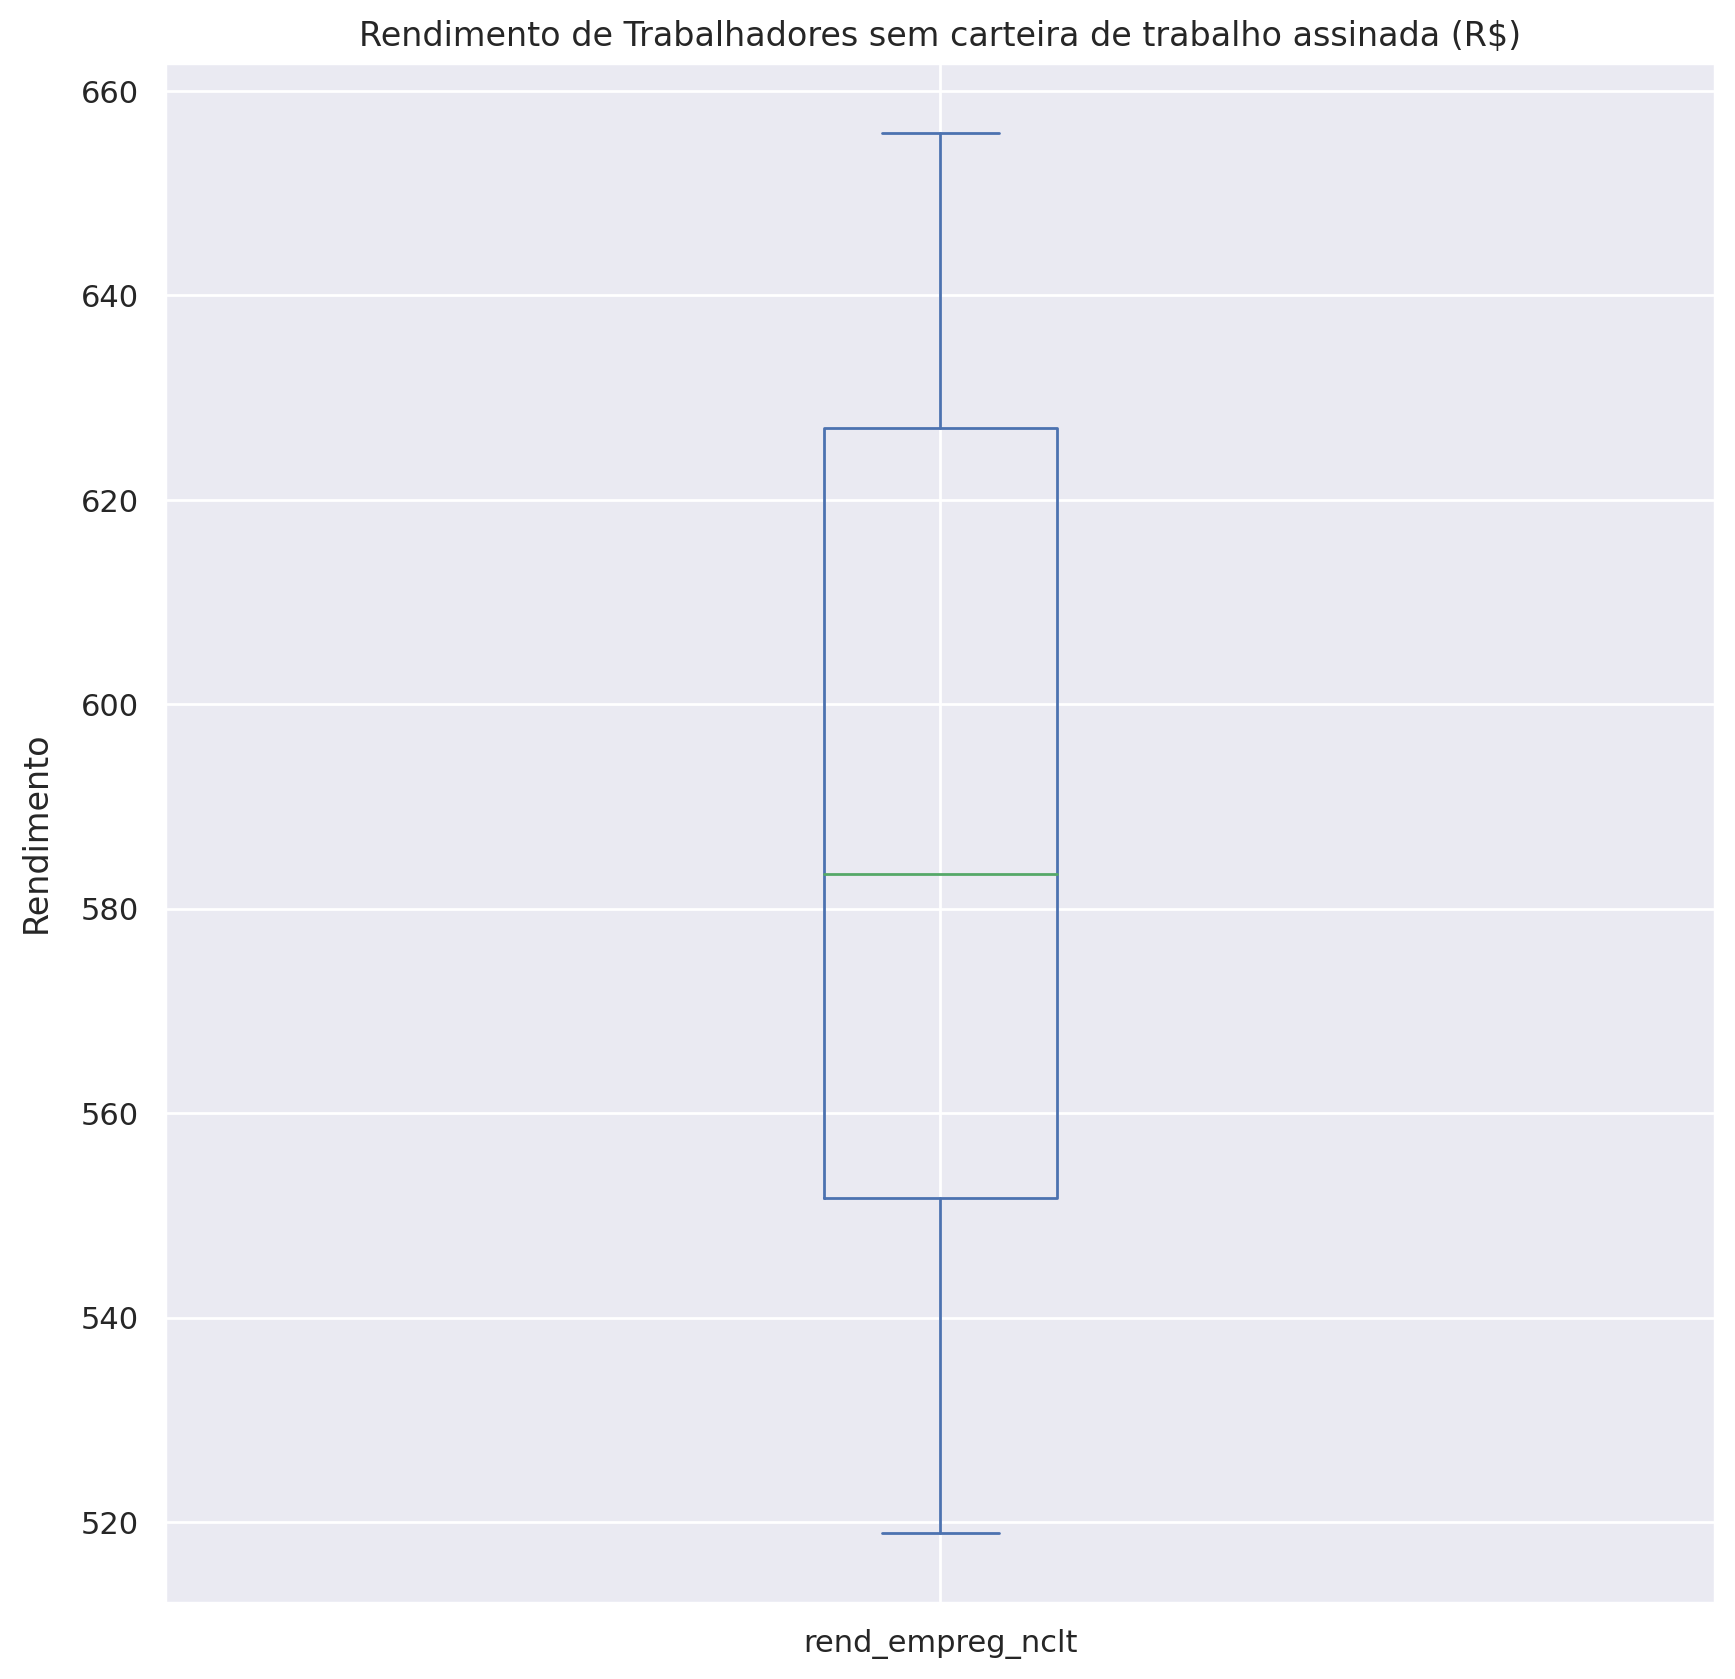

In [35]:
ax = rend_empreg_nclt.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento de Trabalhadores sem carteira de trabalho assinada (R$)')

plt.show()

Renda por autonomos 

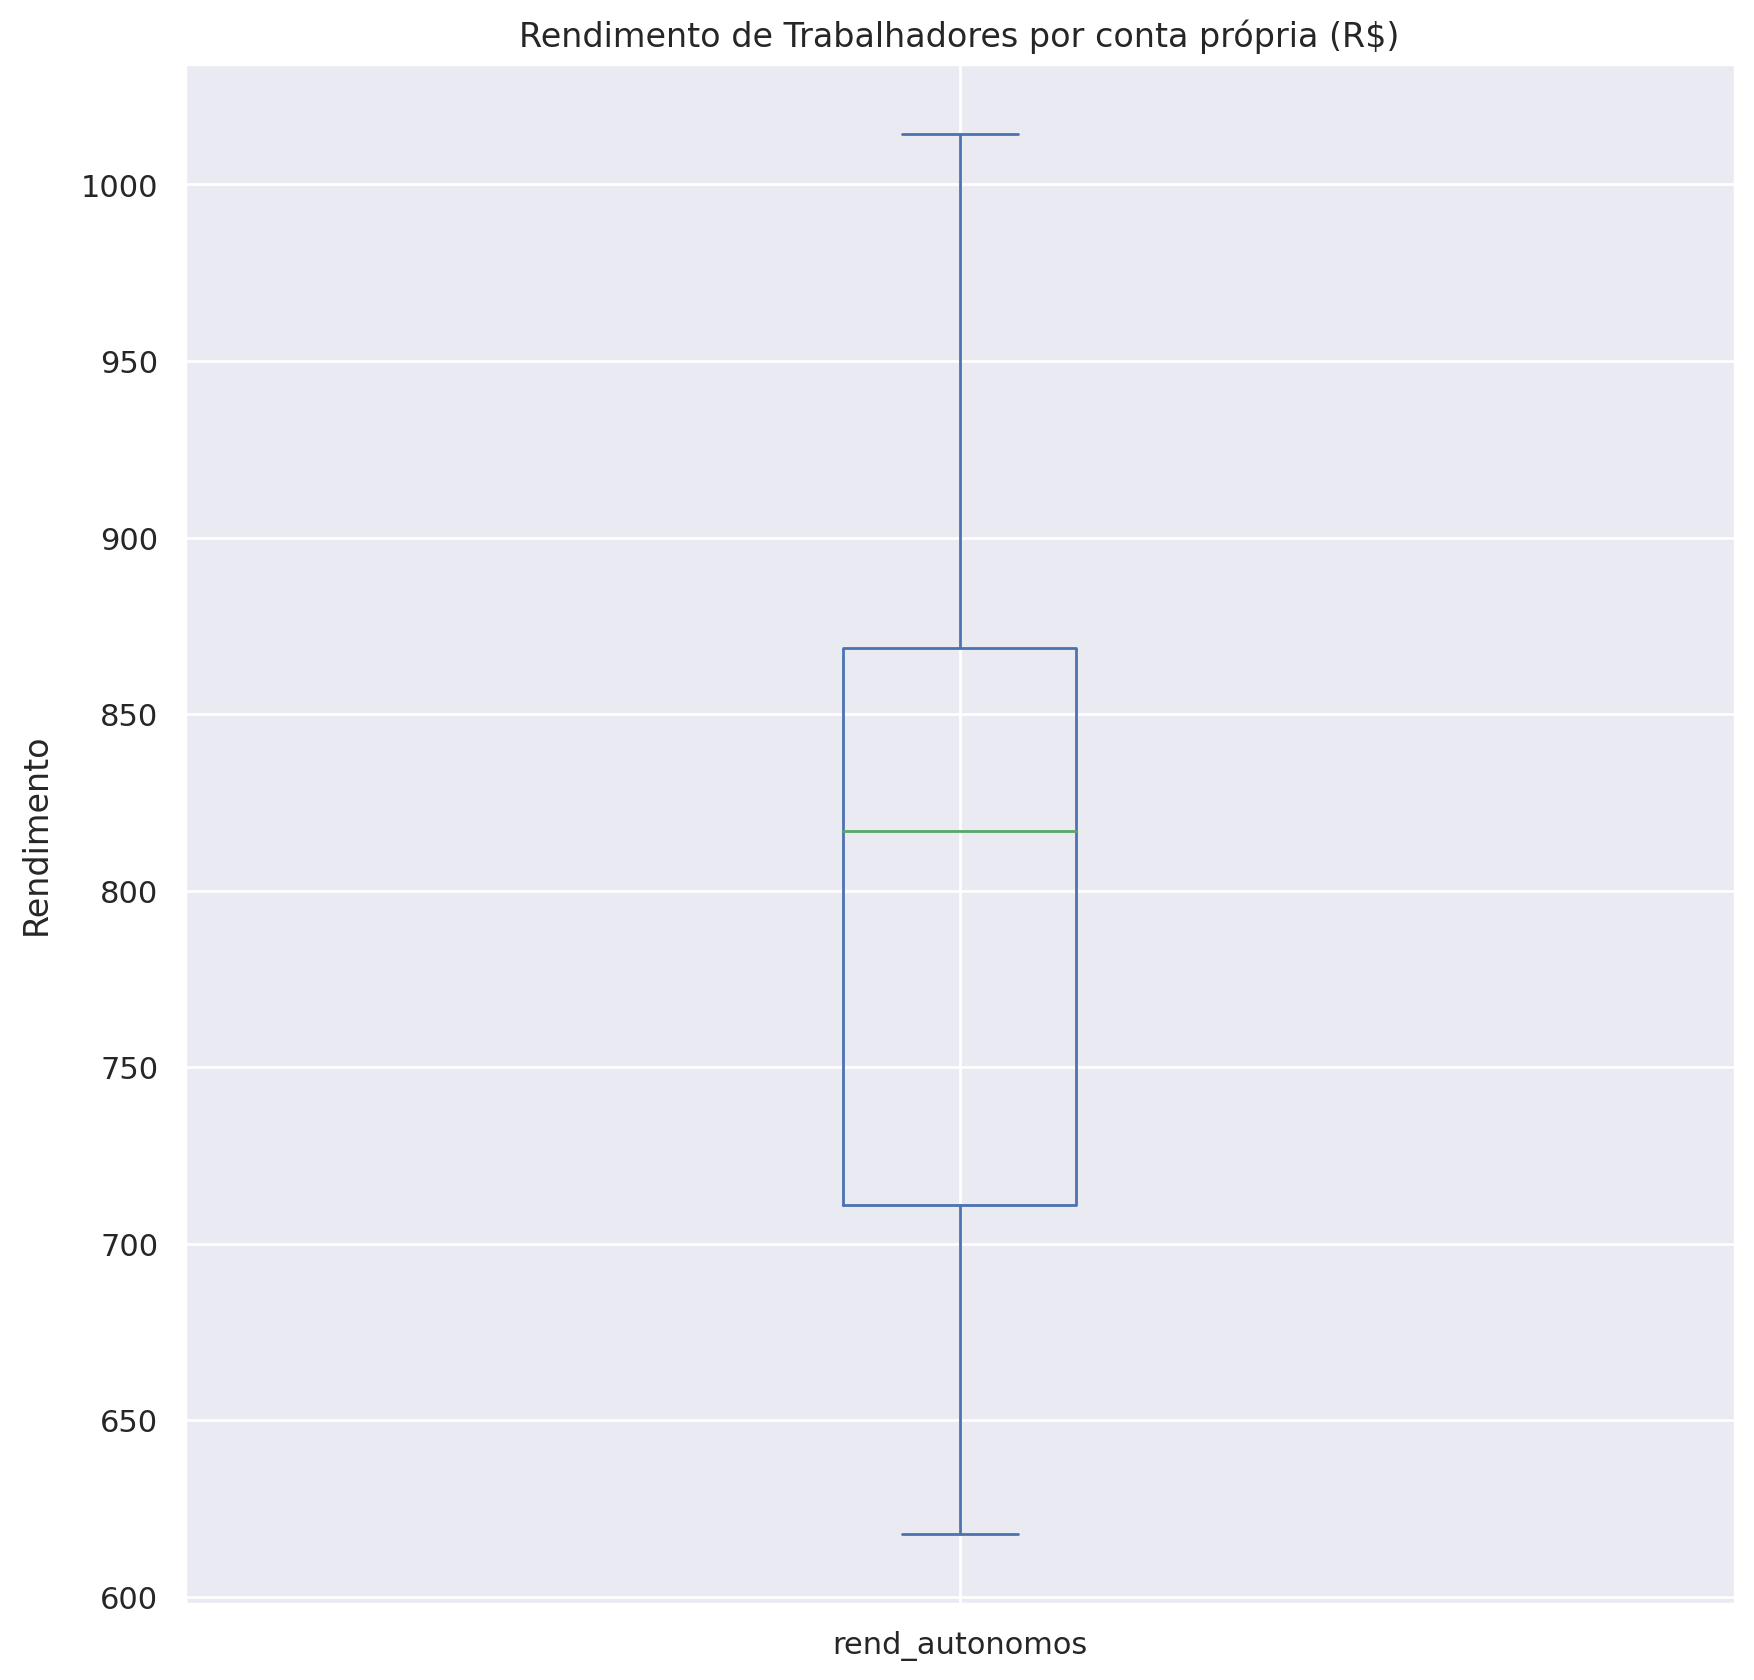

In [36]:
ax = rend_autonomos.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento de Trabalhadores por conta própria (R$)')

plt.show()

Renda por empregador 

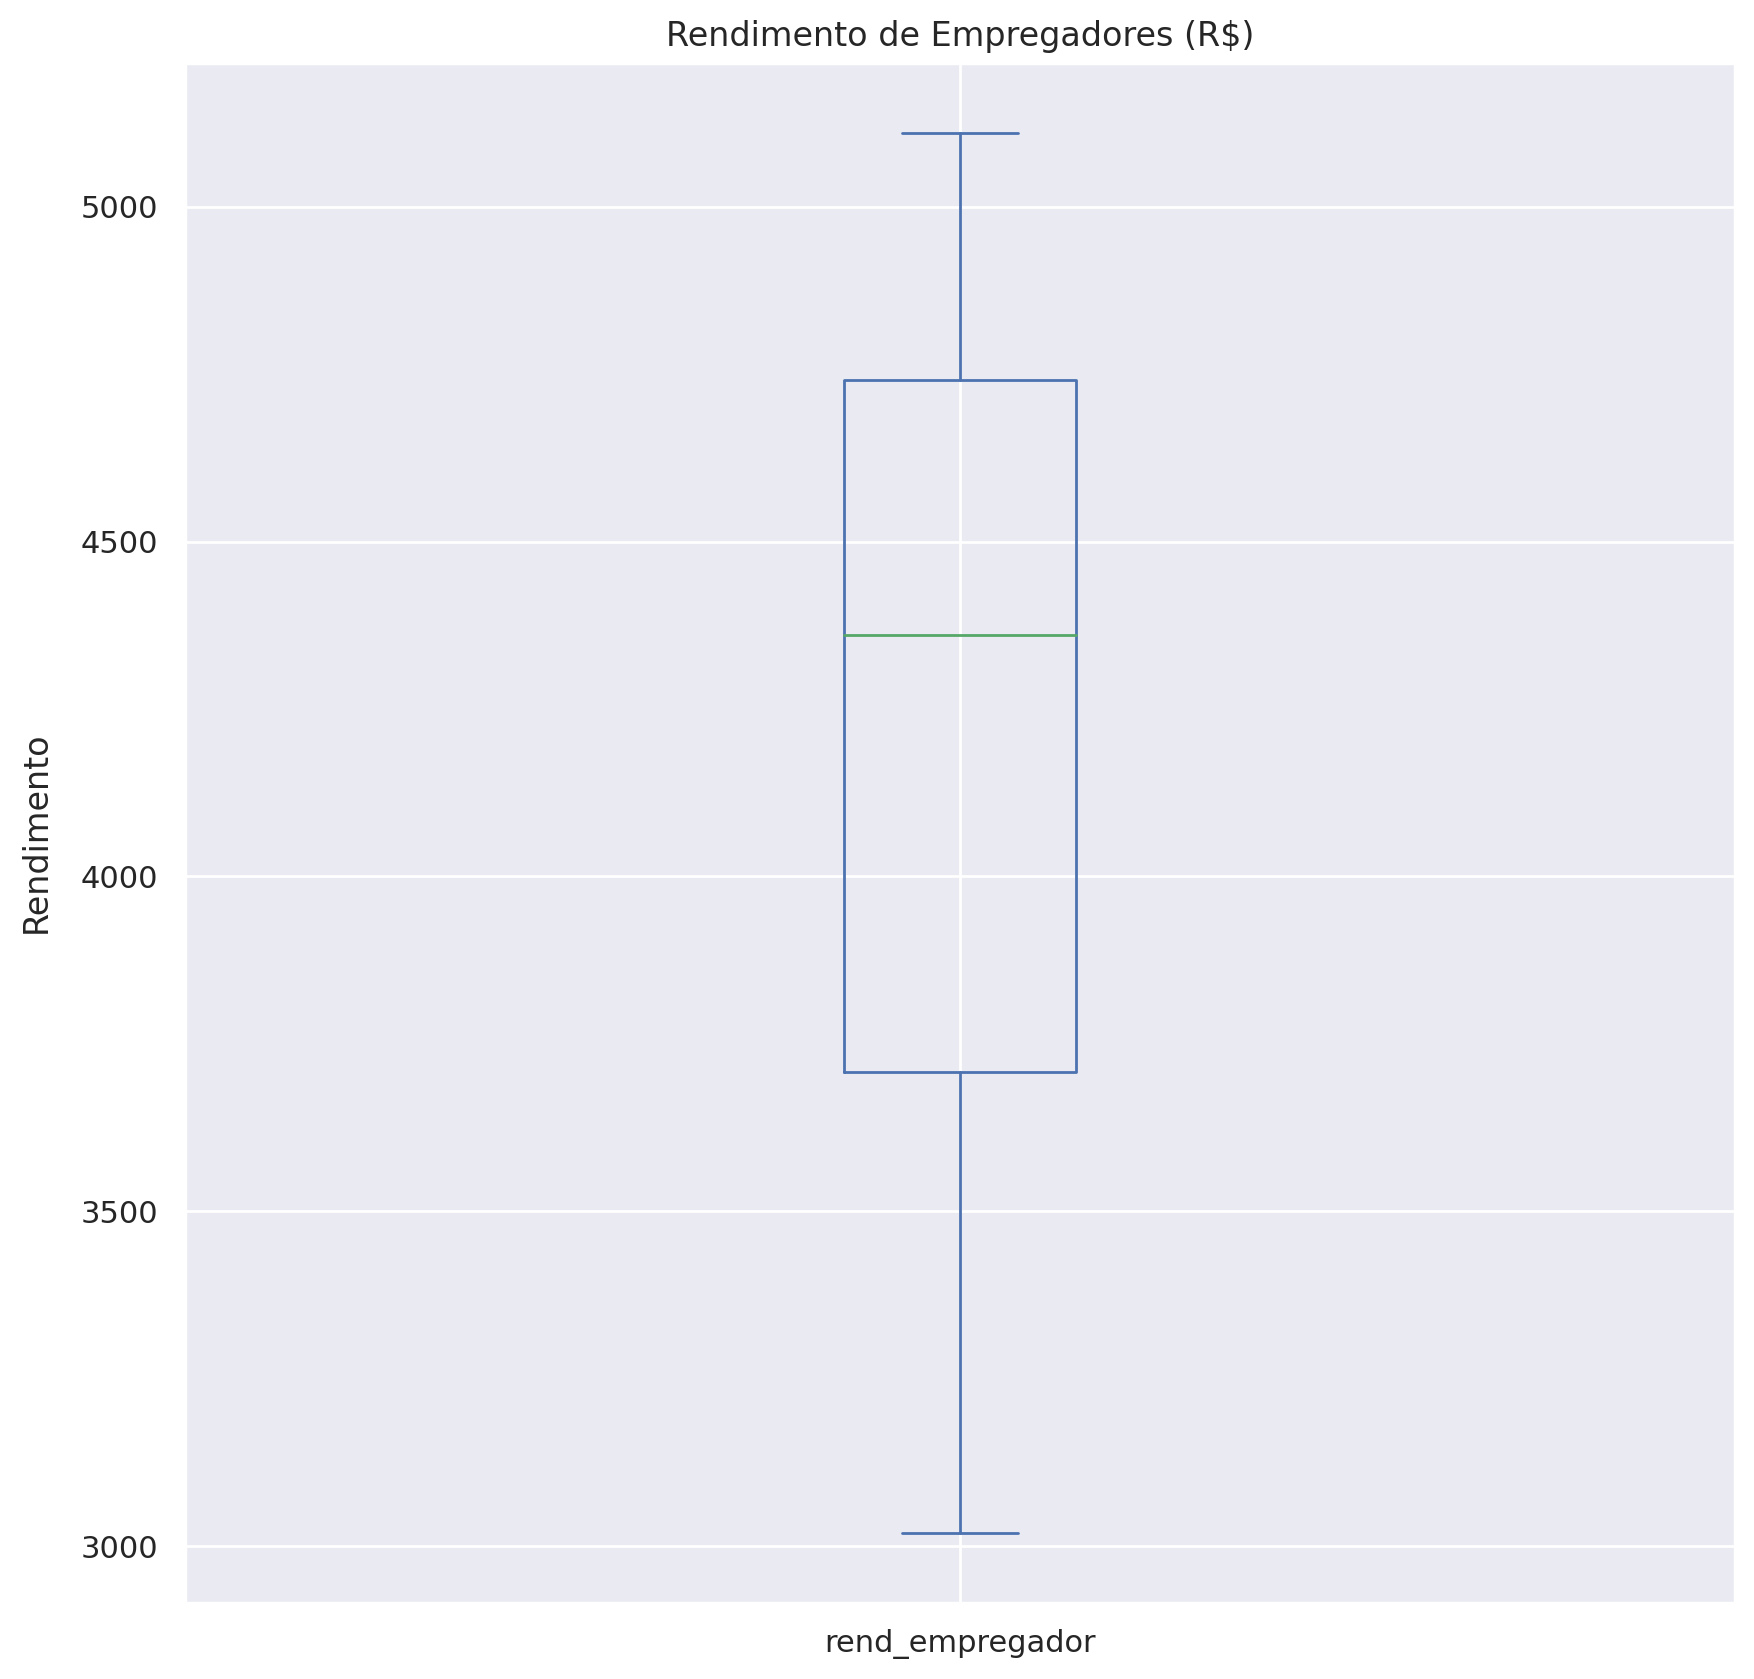

In [37]:
ax = rend_empregador.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento de Empregadores (R$)')

plt.show()

## Escolaridade

Visualização e análise sobre os dados de escolaridade dos estados e municípios brasileiros.

In [38]:
escolaridade_por_estado = df.groupby(
        by='Estado'
    )['adult_fundament_incomp', 'adult_medio_incomp', 'adult_sup_incomp', 'adult_sup_completo'].mean()

escolaridade_por_estado

<ipython-input-38-744edb2f747a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  escolaridade_por_estado = df.groupby(


adult_fundament_incomp  adult_medio_incomp  \
Estado                                                            
Acre                            8629.000000         1876.727273   
Alagoas                        10027.117647         1765.843137   
Amapá                           8056.187500         2617.500000   
Amazonas                       12549.467742         3604.290323   
Bahia                          10888.035971         2186.366906   
Ceará                          14261.483696         3362.293478   
Distrito Federal              451003.000000       210195.000000   
Espírito Santo                 13154.128205         3828.679487   
Goiás                           7052.768293         2136.256098   
Maranhão                        9067.096774         1763.995392   
Mato Grosso                     6182.595745         1787.865248   
Mato Grosso do Sul              9034.782051         2562.525641   
Minas Gerais                    1963.253224          521.547479   
Paraná                          7666.744361         2346.187970   
Paraíba                         5907.793722          999.569507   
Pará                           13596.580420         3627.930070   
Pernambuco                     15108.302703         3246.729730   
Piauí                           4819.526786          848.941964   
Rio Grande do Norte             5962.556886         1300.125749   
Rio Grande do Sul               6483.834677         2238.727823   
Rio de Janeiro                 41384.771739        18861.782609   
Rondonia                        9169.942308         2159.923077   
Roraima                         6427.866667         1841.333333   
Santa Catarina                  5954.358362         2135.126280   
Sergipe                         8502.773333         1779.200000   
São Paulo                      16182.682171         6411.446512   
Tocantins                       2734.877698          624.417266   

                     adult_sup_incomp  adult_sup_completo  
Estado                                                     
Acre                      3477.727273         1383.363636  
Alagoas                   2848.637255         1087.990196  
Amapá                     6321.375000         2074.937500  
Amazonas                  7736.370968         2153.822581  
Bahia                     4376.489209         1197.112710  
Ceará                     5509.902174         1788.532609  
Distrito Federal        470597.000000       358275.000000  
Espírito Santo            6667.641026         2948.576923  
Goiás                     3449.617886         1449.621951  
Maranhão                  3087.308756          800.769585  
Mato Grosso               2696.794326         1252.170213  
Mato Grosso do Sul        4083.833333         2139.807692  
Minas Gerais              7384.378664         1919.233294  
Paraná                    3568.270677         1988.438596  
Paraíba                   1796.681614          760.506726  
Pará                      5520.209790         1555.237762  
Pernambuco                5991.708108         2123.567568  
Piauí                     1291.816964          548.151786  
Rio Grande do Norte       2472.365269          884.407186  
Rio Grande do Sul         3271.760081         1528.241935  
Rio de Janeiro           32863.554348        15600.336957  
Rondonia                  3356.403846         1285.653846  
Roraima                   4333.266667         1429.200000  
Santa Catarina            3155.812287         1614.679181  
Sergipe                   3217.440000         1261.600000  
São Paulo                10747.568992         5958.226357  
Tocantins                 1243.482014          526.669065

Divisão da escolatidade na região norte

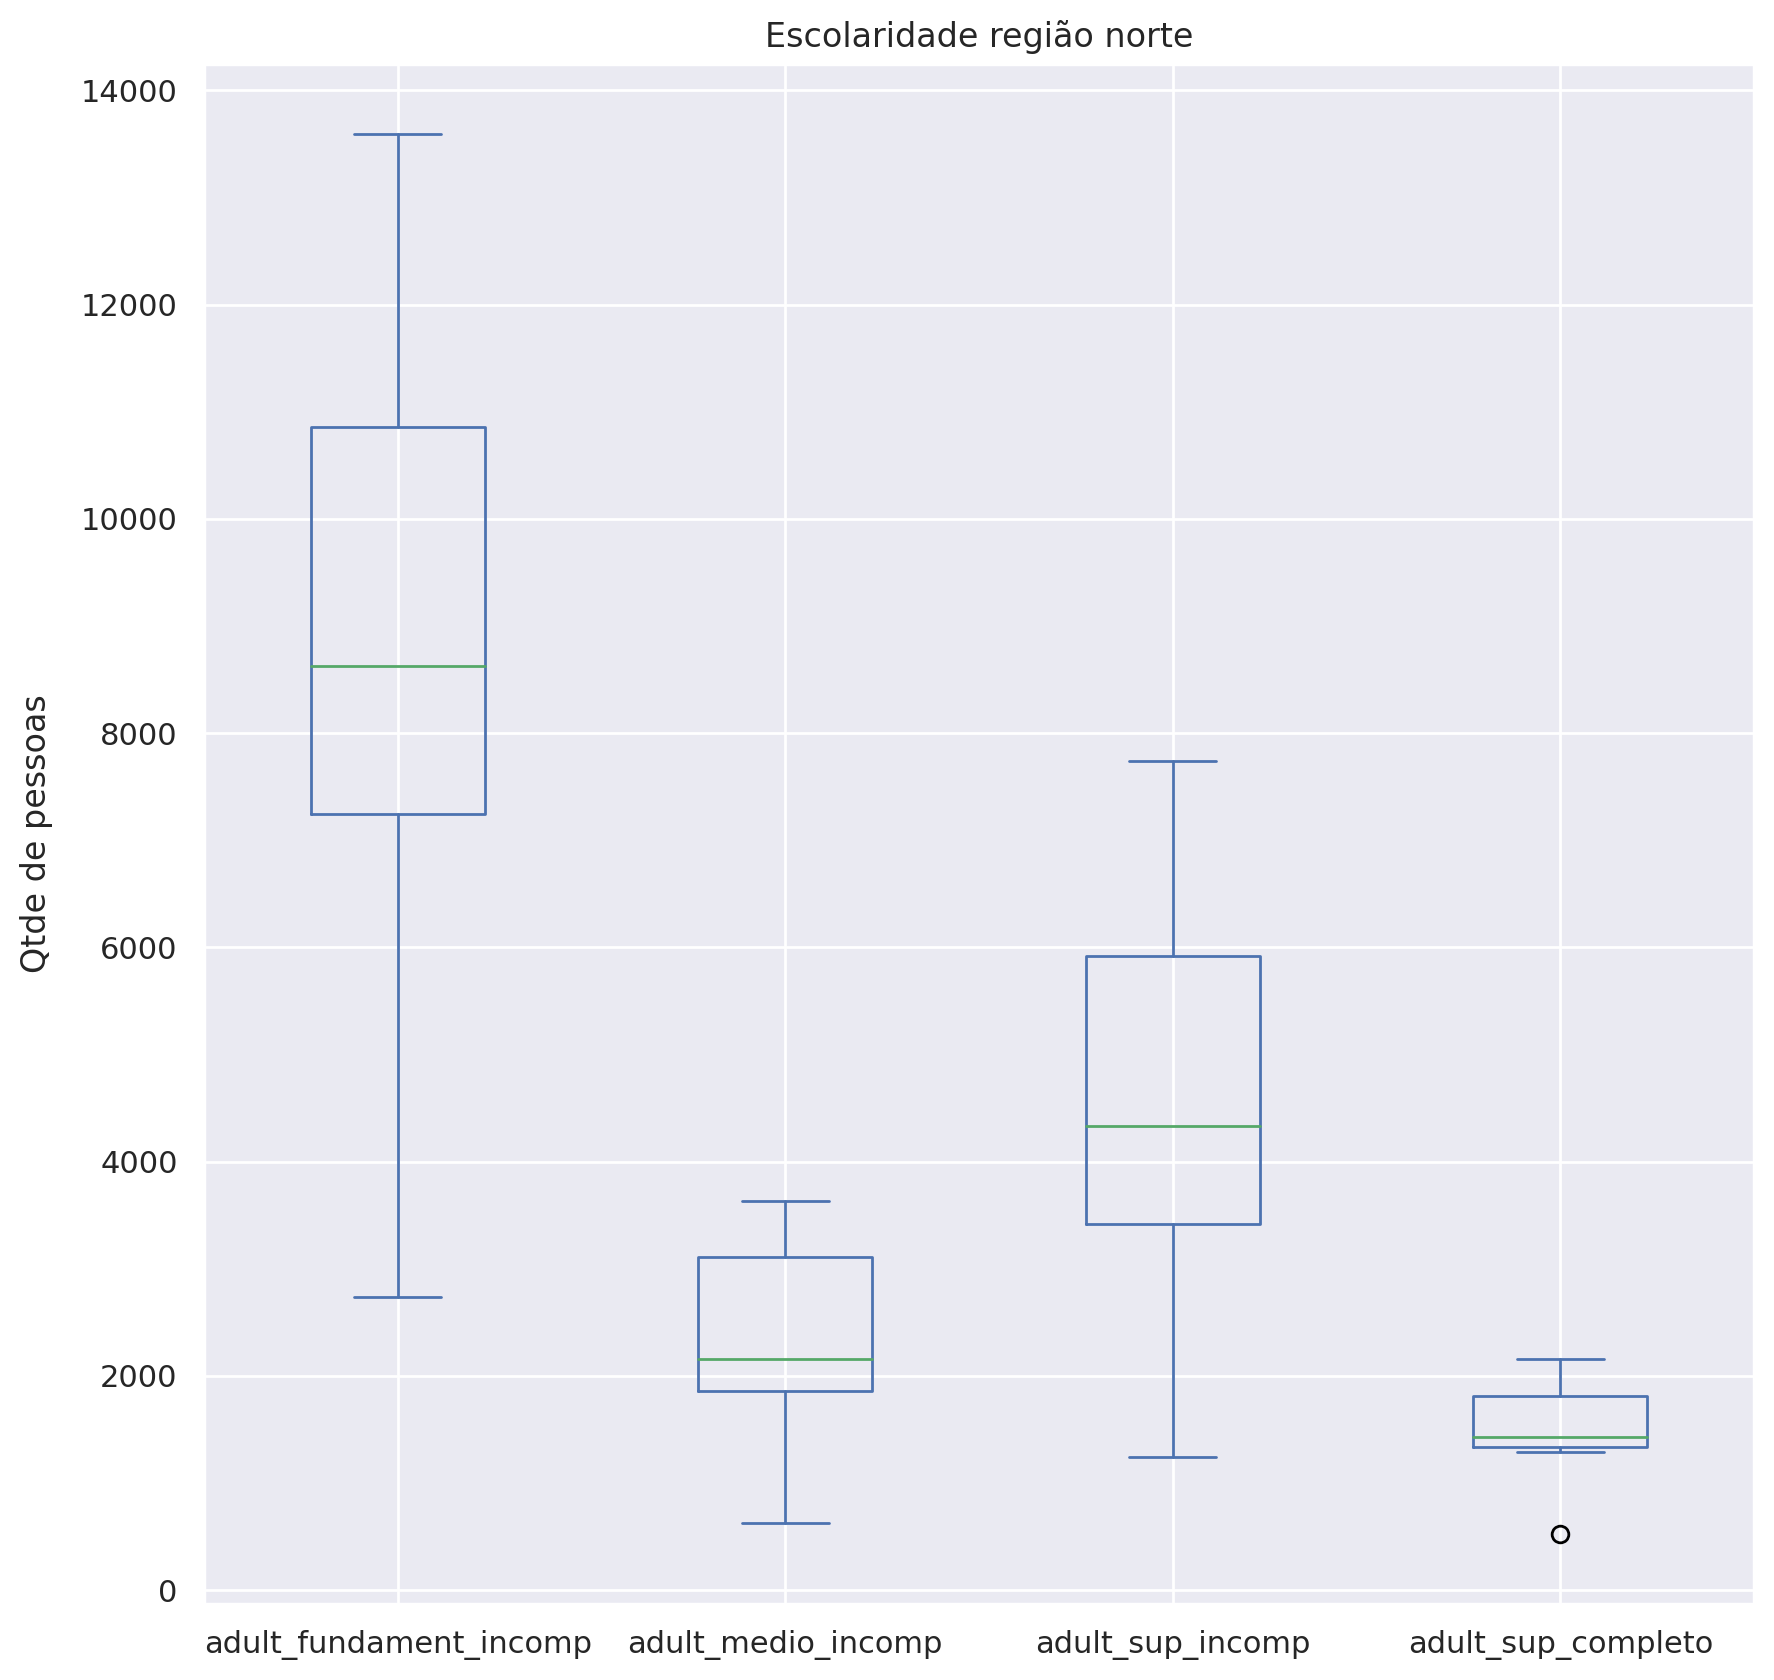

In [39]:
ax = escolaridade_por_estado.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Qtde de pessoas')
ax.set_title('Escolaridade região norte')

plt.show()

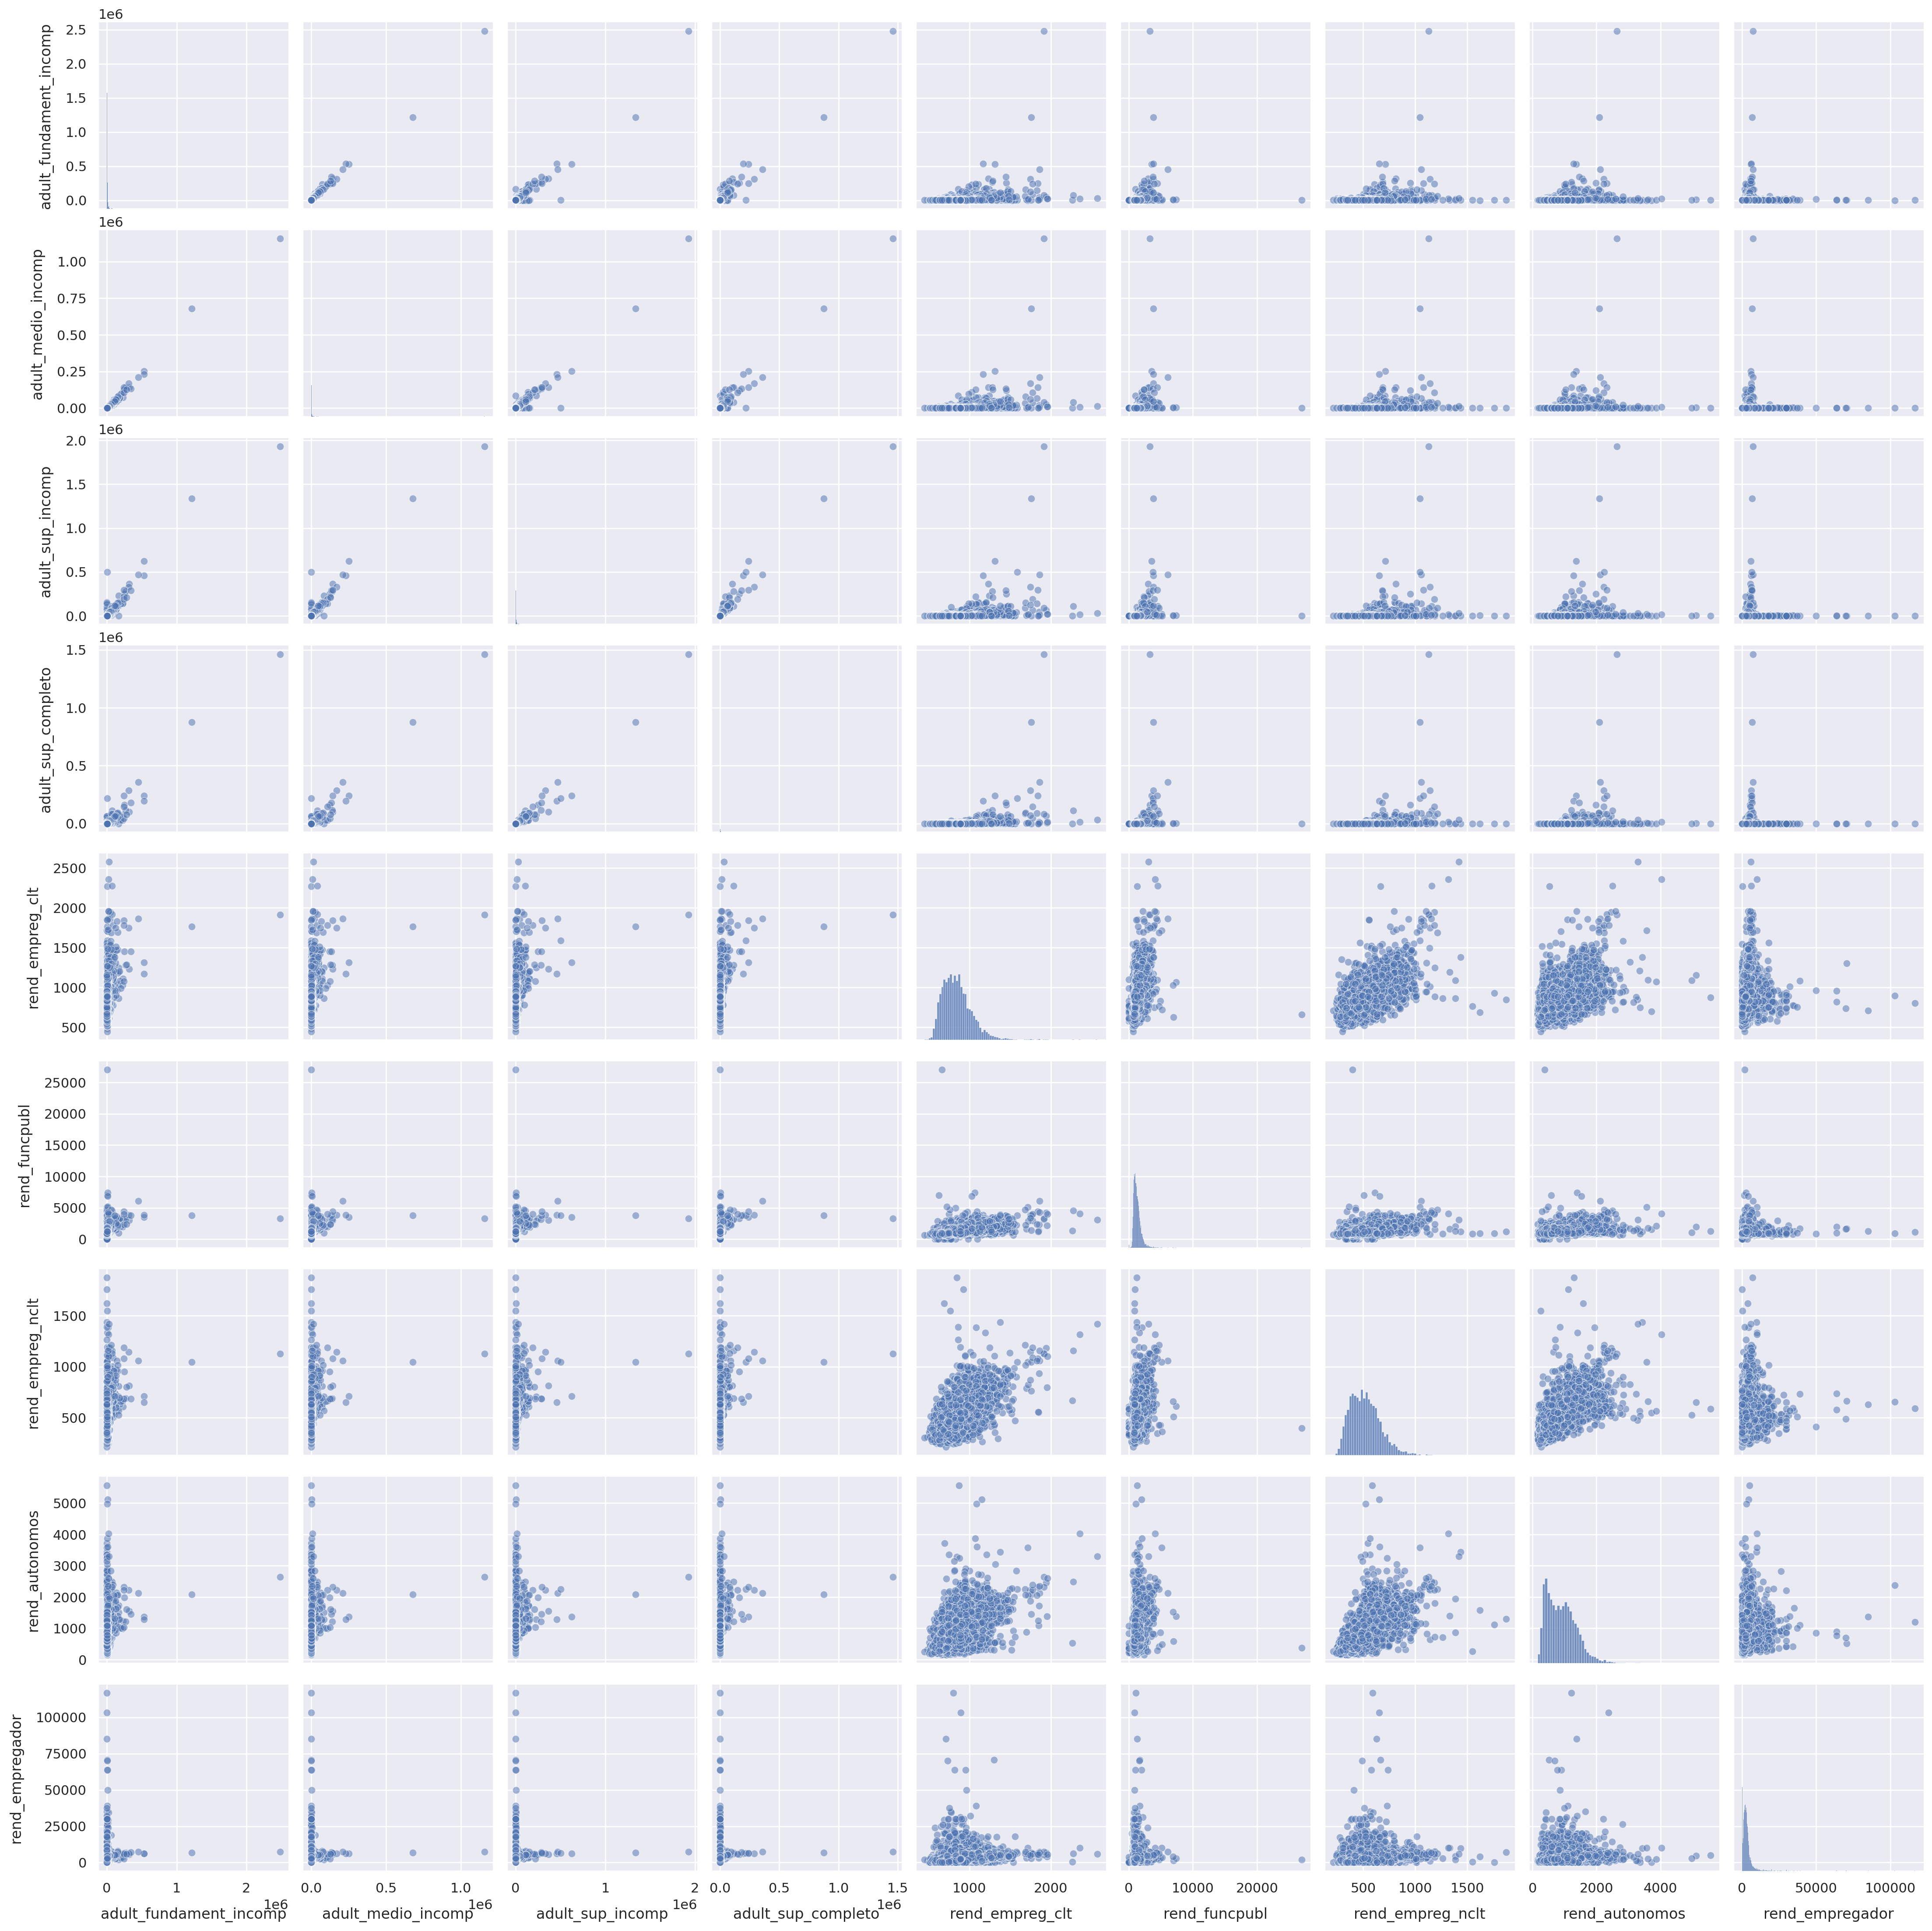

In [40]:
# pair plot renda vs escolaridade

cols = ['adult_fundament_incomp', 'adult_medio_incomp', 'adult_sup_incomp', 'adult_sup_completo', 'rend_empreg_clt', 'rend_funcpubl', 'rend_empreg_nclt', 'rend_autonomos', 'rend_empregador']

sns.pairplot(df[cols],
             plot_kws={'alpha': 0.5})

# Preparação das variáveis dependentes e independentes

Exclusão de variáveis que não serão utilizadas 

In [41]:
df = df.drop(['aposent_ocup',	'aposent_nocup',	'naposent_ocup',	'naposent_nocup',	'contrib_prev',	'ncontrib_prev', 'freq_creche_pub',	'freq_preescola_pub',
              'freq_alfabetizacao_pub',	'freq_eja_pub',	'freq_fundamental_pub',	'freq_medio_pub',	'freq_superior_pub',	'freq_pos_pub',	'freq_creche_priv',	
              'freq_preescola_priv',	'freq_alfabetizacao_priv',	'freq_eja_priv',	'freq_fundamental_priv',	'freq_medio_priv',	'freq_superior_priv',	
              'freq_pos_priv', 'quant_urbano',	'quant_rural'], axis=1)

Soma as variáveis de quem estuda e quem não estuda de acordo com a faixa de idade.


Creche: crianças de 0 a 3 anos (variáveis da faixa 1)
Pré-escola: crianças de 4 a 6 anos (variáveis da faixa 2, 3 e 4)

In [42]:
df['soma_creche'] = df['estud_f1'] + df['nestud_f1']
df['soma_pre'] = df['estud_f2'] + df['nestud_f2']+ df['estud_f3'] + df['nestud_f3']+ df['estud_f4'] + df['nestud_f4']

print (df)

              Cidade     Estado  jovens  adultos  idosos  rend_empreg_clt  \
0         Acrelândia       Acre    2930     6081   10376              945   
1       Assis Brasil       Acre    1344     2856    4811              979   
2          Brasiléia       Acre    4736    10701   17937             1147   
3             Bujari       Acre    1916     4095    7046              935   
4           Capixaba       Acre    2113     4089    7215              873   
...              ...        ...     ...      ...     ...              ...   
5560  Tocantinópolis  Tocantins    4822    11230   19303              894   
5561        Tupirama  Tocantins     326      821    1374              886   
5562      Tupiratins  Tocantins     452     1029    1859              663   
5563    Wanderlândia  Tocantins    2146     5713    9584              886   
5564         Xambioá  Tocantins    2473     5864   10000             1269   

      rend_funcpubl  rend_empreg_nclt  rend_autonomos  rend_empregador  ...

Definir a porcentagem entre a quantidade de crianças com idade para estar em creche e pré-escola, com base na quantidade de crianças **não matriculadas** em cada uma dessas categorias

Creche

In [43]:
df['%_creche'] = df['nestud_f1'] / df['soma_creche']

print (df)

              Cidade     Estado  jovens  adultos  idosos  rend_empreg_clt  \
0         Acrelândia       Acre    2930     6081   10376              945   
1       Assis Brasil       Acre    1344     2856    4811              979   
2          Brasiléia       Acre    4736    10701   17937             1147   
3             Bujari       Acre    1916     4095    7046              935   
4           Capixaba       Acre    2113     4089    7215              873   
...              ...        ...     ...      ...     ...              ...   
5560  Tocantinópolis  Tocantins    4822    11230   19303              894   
5561        Tupirama  Tocantins     326      821    1374              886   
5562      Tupiratins  Tocantins     452     1029    1859              663   
5563    Wanderlândia  Tocantins    2146     5713    9584              886   
5564         Xambioá  Tocantins    2473     5864   10000             1269   

      rend_funcpubl  rend_empreg_nclt  rend_autonomos  rend_empregador  ...

Pré-escola

In [44]:
df['%_pre_escola'] = (df['nestud_f2'] + df['nestud_f3'] + df['nestud_f4']) / df['soma_pre']

print (df)

              Cidade     Estado  jovens  adultos  idosos  rend_empreg_clt  \
0         Acrelândia       Acre    2930     6081   10376              945   
1       Assis Brasil       Acre    1344     2856    4811              979   
2          Brasiléia       Acre    4736    10701   17937             1147   
3             Bujari       Acre    1916     4095    7046              935   
4           Capixaba       Acre    2113     4089    7215              873   
...              ...        ...     ...      ...     ...              ...   
5560  Tocantinópolis  Tocantins    4822    11230   19303              894   
5561        Tupirama  Tocantins     326      821    1374              886   
5562      Tupiratins  Tocantins     452     1029    1859              663   
5563    Wanderlândia  Tocantins    2146     5713    9584              886   
5564         Xambioá  Tocantins    2473     5864   10000             1269   

      rend_funcpubl  rend_empreg_nclt  rend_autonomos  rend_empregador  ...

Definição da variável independente - população 

In [45]:
from pandas.core import describe
df['pop_total'] = df['jovens'] + df['adultos'] + df['idosos']

print(df['pop_total'])


0       19387
1        9011
2       33374
3       13057
4       13417
        ...  
5560    35355
5561     2521
5562     3340
5563    17443
5564    18337
Name: pop_total, Length: 5565, dtype: int64


In [46]:
df['pop_total'].describe()

count    5.565000e+03
mean     5.655531e+04
std      3.419067e+05
min      1.367000e+03
25%      8.550000e+03
50%      1.780800e+04
75%      3.778900e+04
max      1.895605e+07
Name: pop_total, dtype: float64

Definição da variável independente - renda

In [47]:
df['rend_total'] = (df['rend_empreg_clt'] + df['rend_funcpubl'] + df['rend_empreg_nclt'] + df['rend_autonomos'] + df['rend_empregador']) / 5

print(df['rend_total'])

0        961.2
1       1879.0
2       1807.8
3        967.6
4       1091.6
         ...  
5560    1304.8
5561    1114.6
5562     622.2
5563    1202.2
5564    1469.2
Name: rend_total, Length: 5565, dtype: float64


In [48]:
df['rend_total'].describe()

count     5565.000000
mean      1380.065445
std        953.991301
min        256.200000
25%        873.400000
50%       1247.400000
75%       1639.400000
max      24068.600000
Name: rend_total, dtype: float64

Limpeza das observações com IDHM igual a zero

In [49]:
idx_to_drop = df.loc[df['idhm'] == 0].index

df = df.drop(index=idx_to_drop)


Exclui todas a obsevações cujo % de não matrículados em pré-escola é igual a zero

In [50]:
idx_to_drop = df.loc[df['%_pre_escola'] == 0].index

df = df.drop(index=idx_to_drop)


In [51]:
# Lista de índices das observações com %_preescola igual a zero
idx_to_drop = df.loc[df['soma_pre'] < 1000].index

df = df.drop(index=idx_to_drop)

In [52]:
# Lista de índices das observações com %_preescola igual a zero
idx_to_drop = df.loc[df['soma_creche'] < 1000].index

df = df.drop(index=idx_to_drop)

# Stepwise Regression

##***Forward Selection - Creche***

In [53]:
import statsmodels.api as sm

In [54]:
x_indep = df[['pop_total', 'rend_total', 'idhm', 'pib']]
y_dep = df['%_creche']

# adição de constante para o modelo 
x_indep = sm.add_constant(x_indep)

# iniciando o modelo com uma variável vazia 
model = sm.OLS(y_dep, x_indep[['const']]).fit()

# Loop para adicionar variáveis uma de cada vez
for i in x_indep.columns:
    if i != 'const':
        # Adicionando uma variável ao modelo
        model_new = sm.OLS(y_dep, x_indep[['const', i]]).fit()
        # Verificando se a nova variável é significativa
        if model_new.f_pvalue < 0.05:
            model = model_new

# Imprime os resultados do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               %_creche   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     18.73
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.60e-05
Time:                        11:01:37   Log-Likelihood:                 1094.6
No. Observations:                1616   AIC:                            -2185.
Df Residuals:                    1614   BIC:                            -2174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7875      0.003    253.558      0.0

##**Forward Selection - Pré-escola**

In [55]:
x_indep_pre_esc = df[['pop_total', 'rend_total', 'idhm', 'pib']]
y_dep_pre_esc = df['%_pre_escola']

# adição de constante para o modelo 
x_indep_pre_esc = sm.add_constant(x_indep_pre_esc)

# iniciando o modelo com uma variável vazia 
model = sm.OLS(y_dep, x_indep_pre_esc[['const']]).fit()

# Loop para adicionar variáveis uma de cada vez
for i in x_indep_pre_esc.columns:
    if i != 'const':
        # Adicionando uma variável ao modelo
        model_new = sm.OLS(y_dep_pre_esc, x_indep_pre_esc[['const', i]]).fit()
        # Verificando se a nova variável é significativa
        if model_new.f_pvalue < 0.5:
            model = model_new

# Imprimindo os resultados do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           %_pre_escola   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.403
Date:                Mon, 03 Apr 2023   Prob (F-statistic):              0.121
Time:                        11:01:37   Log-Likelihood:                 1375.1
No. Observations:                1616   AIC:                            -2746.
Df Residuals:                    1614   BIC:                            -2735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1584      0.003     60.658      0.0

##**Backward Elimination - Creche**

In [56]:
# Iniciando o processo de backward selection

# adição de constante para o modelo 
x_indep = sm.add_constant(x_indep)

# Enquanto houver mais de uma variável no modelo
while x_indep.shape[1] > 1:
    
    # Ajustando o modelo de regressão linear
    model = sm.OLS(y_dep, x_indep).fit()
    
    # Calculando os valores p para todas as variáveis
    p_vals = model.pvalues
    
    # Encontrando a variável com o maior valor p
    max_p_idx = p_vals.argmax()
    
    # Removendo a variável com o maior valor p
    if max_p_idx == 0:
        x_indep = x_indep.iloc[:, 1:]
    else:
        x_indep = x_indep.drop(x_indep.columns[max_p_idx], axis=1)
    
    # Imprimindo as variáveis selecionadas e os coeficientes correspondentes
    print('Selected features:', list(x_indep.columns))
    print('Coefficients:', model.params)
    print('R-squared:', model.rsquared)
    print('\n')

Selected features: ['const', 'rend_total', 'idhm', 'pib']
Coefficients: const         1.240518e+00
pop_total     4.341977e-09
rend_total    4.965350e-06
idhm         -6.976961e-01
pib          -2.238343e-10
dtype: float64
R-squared: 0.20688385397801734


Selected features: ['const', 'rend_total', 'idhm']
Coefficients: const         1.240246e+00
rend_total    4.970424e-06
idhm         -6.969341e-01
pib          -1.109635e-10
dtype: float64
R-squared: 0.20684224097789627


Selected features: ['const', 'idhm']
Coefficients: const         1.243459
rend_total    0.000005
idhm         -0.701832
dtype: float64
R-squared: 0.20644668692803503


Selected features: ['const']
Coefficients: const    1.236362
idhm    -0.680106
dtype: float64
R-squared: 0.20543577793238832




##**Backward Elimination - Pré-escola**

In [57]:
# Enquanto houver mais de uma variável no modelo
while x_indep_pre_esc.shape[1] > 1:
    
    # Ajustando o modelo de regressão linear
    model = sm.OLS(y_dep_pre_esc, x_indep_pre_esc).fit()
    
    # Calculando os valores p para todas as variáveis
    p_vals = model.pvalues
    
    # Encontrando a variável com o maior valor p
    max_p_idx = p_vals.argmax()
    
    # Removendo a variável com o maior valor p
    if max_p_idx == 0:
        x_indep_pre_esc = x_indep_pre_esc.iloc[:, 1:]
    else:
        x_indep_pre_esc = x_indep_pre_esc.drop(x_indep_pre_esc.columns[max_p_idx], axis=1)
    
    # Imprimindo as variáveis selecionadas e os coeficientes correspondentes
    print('Selected features:', list(x_indep_pre_esc.columns))
    print('Coefficients:', model.params)
    print('R-squared:', model.rsquared)
    print('\n')

Selected features: ['const', 'rend_total', 'idhm', 'pib']
Coefficients: const         3.531656e-01
pop_total    -6.712800e-10
rend_total    1.779480e-05
idhm         -3.360026e-01
pib          -3.069625e-11
dtype: float64
R-squared: 0.06229700307352748


Selected features: ['const', 'rend_total', 'idhm']
Coefficients: const         3.532078e-01
rend_total    1.779402e-05
idhm         -3.361204e-01
pib          -4.814635e-11
dtype: float64
R-squared: 0.062295581440400594


Selected features: ['const', 'idhm']
Coefficients: const         0.354602
rend_total    0.000018
idhm         -0.338246
dtype: float64
R-squared: 0.062189142975962786


Selected features: ['const']
Coefficients: const    0.327960
idhm    -0.256686
dtype: float64
R-squared: 0.041826764753237766




#**Regressão linear**

##Regressão Linear - Creche

In [58]:
import statsmodels.api as sm
import numpy as np

y = np.array(df['%_creche'])
X = np.array(df[['pop_total', 'rend_total', 'idhm', 'pib']])

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     105.1
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.38e-79
Time:                        11:01:37   Log-Likelihood:                 1272.6
No. Observations:                1616   AIC:                            -2535.
Df Residuals:                    1611   BIC:                            -2508.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2405      0.023     53.702      0.0

In [59]:
df['previsao'] = model.predict(X)

df_ordenado = df.sort_values('previsao', ascending=False)

print(df_ordenado[['Cidade', 'Estado', 'previsao']])

print(df_ordenado.head(10))

                  Cidade            Estado  previsao
2487             Melgaço              Pará  0.960917
145     Atalaia do Norte          Amazonas  0.930069
2453              Chaves              Pará  0.928196
2554         Ulianópolis              Pará  0.926140
166              Ipixuna          Amazonas  0.919679
...                  ...               ...       ...
4501       Florianópolis    Santa Catarina  0.663937
4440  Balneário Camboriú    Santa Catarina  0.663428
5253  São Caetano do Sul         São Paulo  0.653311
803             Brasília  Distrito Federal  0.643190
5270           São Paulo         São Paulo  0.609954

[1616 rows x 3 columns]
                         Cidade    Estado  jovens  adultos  idosos  \
2487                    Melgaço      Pará    6646     9869   18016   
145            Atalaia do Norte  Amazonas    3796     6668   11441   
2453                     Chaves      Pará    5045     9057   16113   
2554                Ulianópolis      Pará    9233    22752 

In [60]:
!pip install folium

import folium

# cria o mapa centralizado no Brasil
brasil_map = folium.Map(location=[-15.7797, -47.9297], zoom_start=4)

# adiciona pontos em algumas cidades
folium.Marker(
    location=[-1.8066, -50.7149],  # Melgaço
    popup='Melgaço'
).add_to(brasil_map)

folium.Marker(
    location=[-6.1621, -44.8959],  # Fernando Falcão
    popup='Fernando Falcão'
).add_to(brasil_map)
 
folium.Marker(
    location=[-4.2220, -70.1133],  # Atalaia do Norte
    popup='Atalaia do Norte'
).add_to(brasil_map)

folium.Marker(
    location=[-4.6286, -45.1214],  # Marajá do Sena
    popup='Marajá do Sena'
).add_to(brasil_map)

folium.Marker(
    location=[-0.1646, -49.9878],  # Uiramutã
    popup='Barra do Chapéu'
).add_to(brasil_map)

folium.Marker(
    location=[-9.4315, -71.8974],  # Jordão
    popup='Jordao'
).add_to(brasil_map)

folium.Marker(
    location=[-1.9000, -50.2000],  # Bagre
    popup='Bagre'
).add_to(brasil_map)

folium.Marker(
    location=[-1.7592, -46.5459],  # Cachoeira do Piriá
    popup='Cachoeira do Piriá'
).add_to(brasil_map)

# exibe o mapa
brasil_map

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Regressão linear - Pré-escola**

In [61]:
import statsmodels.api as sm
import numpy as np

y = np.array(df['%_pre_escola'])
X = np.array(df[['pop_total', 'rend_total', 'idhm', 'pib']])

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     26.76
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.61e-21
Time:                        11:01:41   Log-Likelihood:                 1425.9
No. Observations:                1616   AIC:                            -2842.
Df Residuals:                    1611   BIC:                            -2815.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3532      0.021     16.810      0.0

In [62]:
df['previsao'] = model.predict(X)

df_ordenado = df.sort_values('previsao', ascending=False)

print(df_ordenado[['Cidade', 'Estado', 'previsao']])

print(df_ordenado)
print(df_ordenado.head(10))

                        Cidade          Estado  previsao
2554               Ulianópolis            Pará  0.534144
191   São Gabriel da Cachoeira        Amazonas  0.391963
2489                      Moju            Pará  0.300966
1425              Nova Olímpia     Mato Grosso  0.279495
3331          São Bento do Una      Pernambuco  0.266805
...                        ...             ...       ...
4752                     Assis       São Paulo  0.115342
4482                 Concórdia  Santa Catarina  0.114697
4538                Itaiópolis  Santa Catarina  0.109623
4942                  Ilhabela       São Paulo  0.108264
5270                 São Paulo       São Paulo  0.105648

[1616 rows x 3 columns]
                        Cidade          Estado   jovens  adultos    idosos  \
2554               Ulianópolis            Pará     9233    22752     34700   
191   São Gabriel da Cachoeira        Amazonas     8732    16873     29681   
2489                      Moju            Pará    17042  

In [63]:
import folium

# cria o mapa centralizado no Brasil
brasil_map = folium.Map(location=[-15.7797, -47.9297], zoom_start=4)

# adiciona pontos em algumas cidades
folium.Marker(
    location=[-14.4653, -46.4151],  # Buritinopolis
    popup='Buritinopolis'
).add_to(brasil_map)

folium.Marker(
    location=[-3.7505, -47.4895],  # Ulianópolis
    popup='Ulianópolis'
).add_to(brasil_map)


folium.Marker(
    location=[-28.7912, -55.2443],  # Itacurubi
    popup='Itacurubi'
).add_to(brasil_map)
 
folium.Marker(
    location=[-24.4728, -49.0232],  # Barra do Chapéu
    popup='Barra do Chapéu'
).add_to(brasil_map)

folium.Marker(
    location=[-1.8828, -66.9292],  # Japurá
    popup='Japurá'
).add_to(brasil_map)

folium.Marker(
    location=[-0.1191, -67.0842],  # São Gabriel da Cachoeira
    popup='São Gabriel da Cachoeira'
).add_to(brasil_map)

folium.Marker(
    location=[-27.4975, -53.6892],  # Miraguaí
    popup='Miraguaí'
).add_to(brasil_map)

folium.Marker(
    location=[-4.0372, -44.4803],  # São Mateus do Maranhão
    popup='São Mateus do Maranhão'
).add_to(brasil_map)

folium.Marker(
    location=[-1.8894, -48.7672],  # Moju
    popup='Moju'
).add_to(brasil_map)

folium.Marker(
    location=[-14.7883, -57.2889],  # Nova Olímpia
    popup='Nova Olímpia'
).add_to(brasil_map)

# exibe o mapa
brasil_map

#**Reamostragem**

A reamostragem é uma técnica estatística que envolve a criação de novas amostras a partir dos dados originais, com o objetivo de obter informações adicionais ou melhorar a precisão das estimativas.



In [64]:
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [66]:
X = df[['pop_total', 'rend_total', 'idhm', 'pib']]
y = df['%_pre_escola']


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

mse = mean_squared_error(y_valid, y_pred)
print('MSE:', mse)


MSE: 0.009449685481949247


MSE list: [0.012005596960350466, 0.008982323341279106, 0.010701788184865816, 0.010194357359484391, 0.00969369979990797, 0.00915542334982861, 0.009462522359665508, 0.01019751439218287, 0.00924618357377804, 0.009642608759541524]
Average MSE: 0.00992820180808843


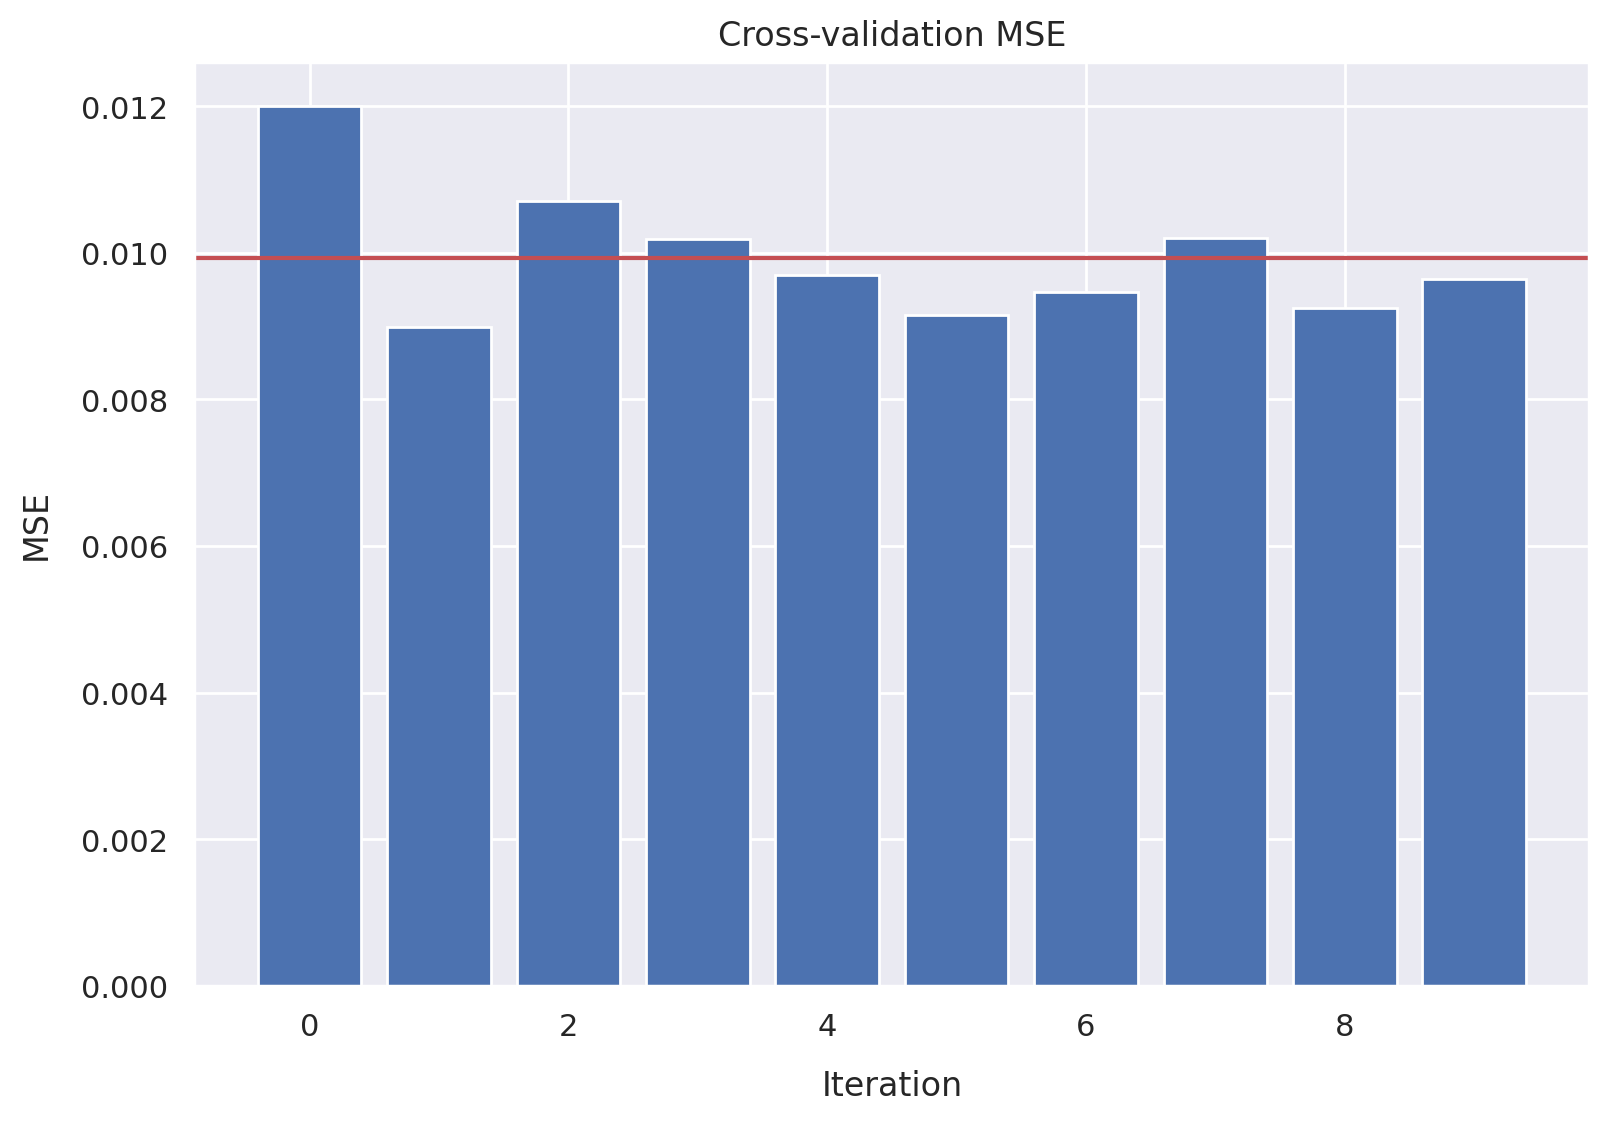

In [67]:
n_splits = 10
mse_list = []

for i in range(n_splits):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    mse_list.append(mse)

print('MSE list:', mse_list)
print('Average MSE:', np.mean(mse_list))

plt.bar(range(n_splits), mse_list)
plt.axhline(y=np.mean(mse_list), color='r', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Cross-validation MSE')
plt.show()


## Comparação dos dados de treinamento e teste

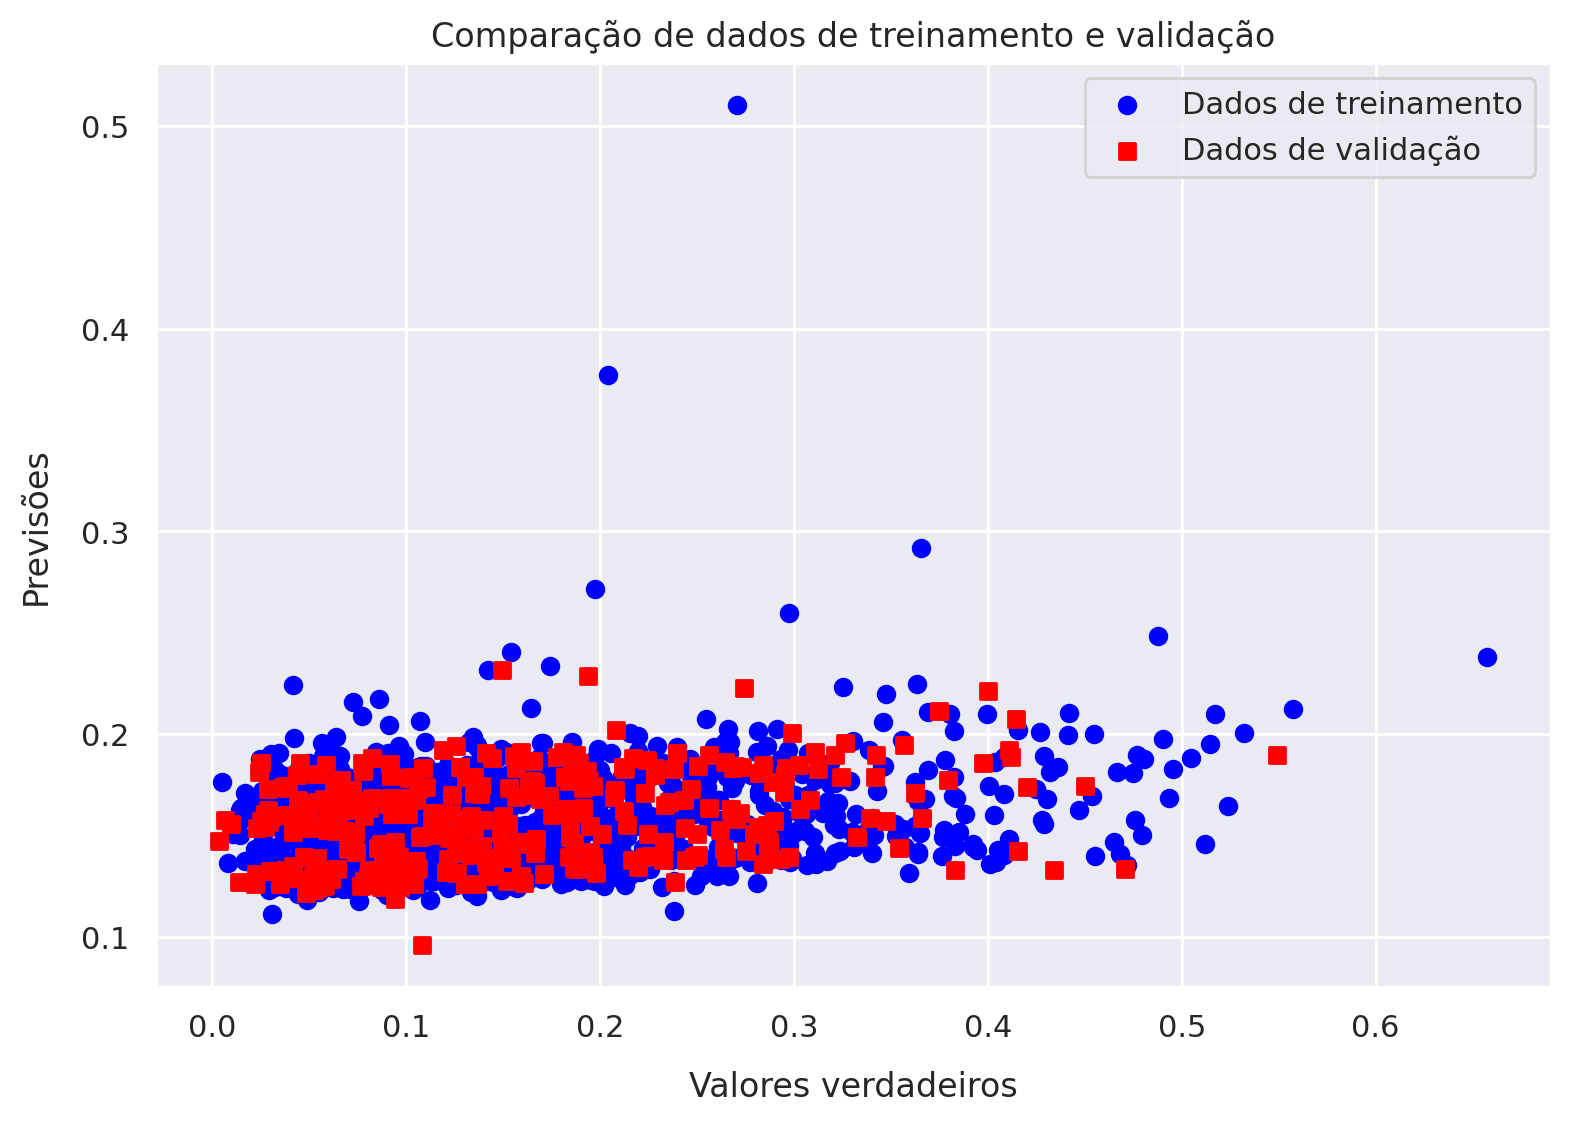

In [68]:
pred_train = model.predict(X_train)
pred_val = model.predict(X_valid)

# erro quadrático médio para cada conjunto de dados
mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_valid, pred_val)

fig, ax = plt.subplots()

ax.scatter(y_train, pred_train, label="Dados de treinamento", color="blue", marker="o")

ax.scatter(y_valid, pred_val, label="Dados de validação", color="red", marker="s")

ax.set_title("Comparação de dados de treinamento e validação")
ax.set_xlabel("Valores verdadeiros")
ax.set_ylabel("Previsões")

plt.legend()
plt.show()
